In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.special import inv_boxcox
from sklearn.preprocessing import Normalizer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
fifa_data = pd.read_csv('data_mid_bootcamp_project_FIFA_MoneyBall-master/fifa21_male2.csv')
fifa_data.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [18]:
#fifa_data = pd.read_csv('data_mid_bootcamp_project_FIFA_MoneyBall-master/fifa21_male2.csv')
#fifa_data.columns

## 1. choosing the columns we want

In [3]:
data = fifa_data[['ID',
 'Name',
 'Age',
 'OVA',
 'BOV',
 'POT',
 'Growth',
 'A/W',
 'D/W',
 'Value',
 'Total Stats',
 'Base Stats',
 'Composure',
 'Stamina',
 'Strength',
 'Power',
 'Reactions']]
data

ID             Name  Age  OVA  BOV  POT  Growth     A/W     D/W  \
0           2      G. Pasquale   33   69   71   69       0  Medium    High   
1          16      Luis García   37   71   70   71       0  Medium  Medium   
2          27          J. Cole   33   71   71   71       0  Medium     Low   
3          36         D. Yorke   36   68   70   82      14     NaN     NaN   
4          41          Iniesta   36   81   82   81       0    High  Medium   
...       ...              ...  ...  ...  ...  ...     ...     ...     ...   
17120  259088       A. Medioub   22   64   66   69       5  Medium  Medium   
17121  259090       W. Rickard   18   56   58   66      10  Medium  Medium   
17122  259091       C. Barrett   18   56   56   67      11  Medium  Medium   
17123  259101   J. Gazibegović   20   62   62   73      11    High  Medium   
17124  259105  Pablo Rodríguez   18   59   61   74      15    High  Medium   

       Value  Total Stats  Base Stats  Composure  Stamina  Strength  Power  \
0      €625K         1929         408        NaN       69        68    347   
1      €600K         1906         385       79.0       64        60    324   
2      €1.1M         1770         354        NaN       29        56    284   
3         €0         1348         369        NaN       51        66    239   
4      €5.5M         2014         420       89.0       58        62    297   
...      ...          ...         ...        ...      ...       ...    ...   
17120  €550K         1367         302       46.0       59        74    279   
17121  €130K         1529         319       46.0       53        57    271   
17122  €130K         1430         303       43.0       53        54    233   
17123  €475K         1579         335       54.0       57        48    261   
17124  €325K         1401         295       57.0       55        52    288   

       Reactions  
0             69  
1             65  
2             59  
3             55  
4             75  
...          ...  
17120         48  
17121         54  
17122         59  
17123         56  
17124         53  

[17125 rows x 17 columns]

# Standardizing

In [4]:
def cleaning_1(data): 
    cols = [col_name.lower().replace(' ', '_') for col_name in data.columns]
    data.columns = cols
    question1 = input("Are there columns to drop? (Y/N)")
    while question1 == "Y":
        which_one = input("Enter column to drop (None: script runs further):")
        if which_one != "None":
            data = data.drop([which_one], axis=1)
            question2 = input("Are there more columns to drop? (Y/N)")
            if question2 == "Y":
                question1 = question2
            elif question2 == "N":
                print("No more columns dropped.")
                break
            else:
                print("Error: input must be Y or N!")
                question2 = input("Are there more columns to drop? (Y/N)")   
        elif which_one == "None":
            break   
    if question1 == "N":
        print("No columns dropped.")
    elif question1 != "Y" and question1 != "N":
        print("Error: input must be Y or N!")
        question1 = input("Are there columns to drop? (Y/N)")
        while question1 == "Y":
            which_one = input("Enter column to drop (None: continue without dropping or random key: repeat question):")
            if which_one == "None":
                break
            elif which_one != "None":
                data = data.drop([which_one], axis=1)
                question2 = input("Are there more columns to drop? (Y/N)")
                if question2 == "Y":
                    question1 = question2
                elif question2 == "N":
                    print("No more columns dropped.")
                    break
                else:
                    print("Error: input must be Y or N!")
                    question2 = input("Are there more columns to drop? (Y/N)")
        if question1 == "N":
            print("No columns dropped.")
        elif question1 != "Y" and question1 != "N":
            ("Error: input must be Y or N! To drop columns re-run function. Standardisation nevertheless complete")
            question1 = input("Are there columns to drop? (Y/N)")
    return data

In [5]:
cleaning_1(data) #standardize data

No columns dropped.


id             name  age  ova  bov  pot  growth     a/w     d/w  \
0           2      G. Pasquale   33   69   71   69       0  Medium    High   
1          16      Luis García   37   71   70   71       0  Medium  Medium   
2          27          J. Cole   33   71   71   71       0  Medium     Low   
3          36         D. Yorke   36   68   70   82      14     NaN     NaN   
4          41          Iniesta   36   81   82   81       0    High  Medium   
...       ...              ...  ...  ...  ...  ...     ...     ...     ...   
17120  259088       A. Medioub   22   64   66   69       5  Medium  Medium   
17121  259090       W. Rickard   18   56   58   66      10  Medium  Medium   
17122  259091       C. Barrett   18   56   56   67      11  Medium  Medium   
17123  259101   J. Gazibegović   20   62   62   73      11    High  Medium   
17124  259105  Pablo Rodríguez   18   59   61   74      15    High  Medium   

       value  total_stats  base_stats  composure  stamina  strength  power  \
0      €625K         1929         408        NaN       69        68    347   
1      €600K         1906         385       79.0       64        60    324   
2      €1.1M         1770         354        NaN       29        56    284   
3         €0         1348         369        NaN       51        66    239   
4      €5.5M         2014         420       89.0       58        62    297   
...      ...          ...         ...        ...      ...       ...    ...   
17120  €550K         1367         302       46.0       59        74    279   
17121  €130K         1529         319       46.0       53        57    271   
17122  €130K         1430         303       43.0       53        54    233   
17123  €475K         1579         335       54.0       57        48    261   
17124  €325K         1401         295       57.0       55        52    288   

       reactions  
0             69  
1             65  
2             59  
3             55  
4             75  
...          ...  
17120         48  
17121         54  
17122         59  
17123         56  
17124         53  

[17125 rows x 17 columns]

In [6]:
def symb_to_num(x):
    if x[len(x)-1] == "K":
        return 1000
    if x[len(x)-1] == "M":
        return 1000000
    else:
        return 1

In [7]:
data['value'] = data['value'].str.replace('€', '')
data['factors'] = data['value'].apply(lambda x: symb_to_num(x)) # Xisca's idea
data['value'] = data['value'].str.replace('M', '')
data['value'] = data['value'].str.replace('K', '')
data['value'] = data['value'].apply(lambda x: float(x))
data['value'] = data['value'] * data['factors']
data = data.drop(['factors'], axis = 1)
data

id             name  age  ova  bov  pot  growth     a/w     d/w  \
0           2      G. Pasquale   33   69   71   69       0  Medium    High   
1          16      Luis García   37   71   70   71       0  Medium  Medium   
2          27          J. Cole   33   71   71   71       0  Medium     Low   
3          36         D. Yorke   36   68   70   82      14     NaN     NaN   
4          41          Iniesta   36   81   82   81       0    High  Medium   
...       ...              ...  ...  ...  ...  ...     ...     ...     ...   
17120  259088       A. Medioub   22   64   66   69       5  Medium  Medium   
17121  259090       W. Rickard   18   56   58   66      10  Medium  Medium   
17122  259091       C. Barrett   18   56   56   67      11  Medium  Medium   
17123  259101   J. Gazibegović   20   62   62   73      11    High  Medium   
17124  259105  Pablo Rodríguez   18   59   61   74      15    High  Medium   

           value  total_stats  base_stats  composure  stamina  strength  \
0       625000.0         1929         408        NaN       69        68   
1       600000.0         1906         385       79.0       64        60   
2      1100000.0         1770         354        NaN       29        56   
3            0.0         1348         369        NaN       51        66   
4      5500000.0         2014         420       89.0       58        62   
...          ...          ...         ...        ...      ...       ...   
17120   550000.0         1367         302       46.0       59        74   
17121   130000.0         1529         319       46.0       53        57   
17122   130000.0         1430         303       43.0       53        54   
17123   475000.0         1579         335       54.0       57        48   
17124   325000.0         1401         295       57.0       55        52   

       power  reactions  
0        347         69  
1        324         65  
2        284         59  
3        239         55  
4        297         75  
...      ...        ...  
17120    279         48  
17121    271         54  
17122    233         59  
17123    261         56  
17124    288         53  

[17125 rows x 17 columns]

## Dealing with Null values

In [8]:
data.isnull().sum() #find nulls


id               0
name             0
age              0
ova              0
bov              0
pot              0
growth           0
a/w             89
d/w             89
value            0
total_stats      0
base_stats       0
composure      423
stamina          0
strength         0
power            0
reactions        0
dtype: int64

In [9]:
data['composure'][data.composure.isna()]=data['composure'].median() # replace NaN with median as it is where the values are closer to the center


In [10]:
data = data.dropna(subset=['a/w'])
data = data.dropna(subset=['d/w'])
data.isnull().sum() 

id             0
name           0
age            0
ova            0
bov            0
pot            0
growth         0
a/w            0
d/w            0
value          0
total_stats    0
base_stats     0
composure      0
stamina        0
strength       0
power          0
reactions      0
dtype: int64

In [11]:
num_data = data.drop(['a/w','d/w','name','id'], axis=1)
num_data

age  ova  bov  pot  growth      value  total_stats  base_stats  \
0       33   69   71   69       0   625000.0         1929         408   
1       37   71   70   71       0   600000.0         1906         385   
2       33   71   71   71       0  1100000.0         1770         354   
4       36   81   82   81       0  5500000.0         2014         420   
5       27   66   66   70       4   725000.0         1649         360   
...    ...  ...  ...  ...     ...        ...          ...         ...   
17120   22   64   66   69       5   550000.0         1367         302   
17121   18   56   58   66      10   130000.0         1529         319   
17122   18   56   56   67      11   130000.0         1430         303   
17123   20   62   62   73      11   475000.0         1579         335   
17124   18   59   61   74      15   325000.0         1401         295   

       composure  stamina  strength  power  reactions  
0           61.0       69        68    347         69  
1           79.0       64        60    324         65  
2           61.0       29        56    284         59  
4           89.0       58        62    297         75  
5           61.0       64        61    315         65  
...          ...      ...       ...    ...        ...  
17120       46.0       59        74    279         48  
17121       46.0       53        57    271         54  
17122       43.0       53        54    233         59  
17123       54.0       57        48    261         56  
17124       57.0       55        52    288         53  

[17036 rows x 13 columns]

# begin exploring

In [12]:
data_corr = num_data.corr()
data_corr = round(data_corr,2)
data_corr

age   ova   bov   pot  growth  value  total_stats  base_stats  \
age          1.00  0.52  0.45 -0.25   -0.86   0.10         0.29        0.41   
ova          0.52  1.00  0.99  0.59   -0.60   0.64         0.61        0.83   
bov          0.45  0.99  1.00  0.62   -0.55   0.65         0.64        0.83   
pot         -0.25  0.59  0.62  1.00    0.30   0.57         0.33        0.47   
growth      -0.86 -0.60 -0.55  0.30    1.00  -0.19        -0.39       -0.52   
value        0.10  0.64  0.65  0.57   -0.19   1.00         0.39        0.53   
total_stats  0.29  0.61  0.64  0.33   -0.39   0.39         1.00        0.68   
base_stats   0.41  0.83  0.83  0.47   -0.52   0.53         0.68        1.00   
composure    0.41  0.70  0.71  0.37   -0.46   0.45         0.78        0.61   
stamina      0.07  0.34  0.37  0.17   -0.23   0.23         0.76        0.40   
strength     0.35  0.34  0.33  0.03   -0.37   0.14         0.18        0.20   
power        0.32  0.55  0.58  0.22   -0.43   0.33         0.87        0.58   
reactions    0.50  0.87  0.87  0.47   -0.56   0.56         0.61        0.75   

             composure  stamina  strength  power  reactions  
age               0.41     0.07      0.35   0.32       0.50  
ova               0.70     0.34      0.34   0.55       0.87  
bov               0.71     0.37      0.33   0.58       0.87  
pot               0.37     0.17      0.03   0.22       0.47  
growth           -0.46    -0.23     -0.37  -0.43      -0.56  
value             0.45     0.23      0.14   0.33       0.56  
total_stats       0.78     0.76      0.18   0.87       0.61  
base_stats        0.61     0.40      0.20   0.58       0.75  
composure         1.00     0.51      0.27   0.70       0.68  
stamina           0.51     1.00      0.23   0.76       0.35  
strength          0.27     0.23      1.00   0.47       0.31  
power             0.70     0.76      0.47   1.00       0.55  
reactions         0.68     0.35      0.31   0.55       1.00

1. we don't want multicolinearity
- correlations between features (not target) 
- need variables that are independent from one another
2. We want high correlation with the target variable --> will help predict

drop BOV

In [13]:
num_data = num_data.drop('bov', axis = 1)
num_data

age  ova  pot  growth      value  total_stats  base_stats  composure  \
0       33   69   69       0   625000.0         1929         408       61.0   
1       37   71   71       0   600000.0         1906         385       79.0   
2       33   71   71       0  1100000.0         1770         354       61.0   
4       36   81   81       0  5500000.0         2014         420       89.0   
5       27   66   70       4   725000.0         1649         360       61.0   
...    ...  ...  ...     ...        ...          ...         ...        ...   
17120   22   64   69       5   550000.0         1367         302       46.0   
17121   18   56   66      10   130000.0         1529         319       46.0   
17122   18   56   67      11   130000.0         1430         303       43.0   
17123   20   62   73      11   475000.0         1579         335       54.0   
17124   18   59   74      15   325000.0         1401         295       57.0   

       stamina  strength  power  reactions  
0           69        68    347         69  
1           64        60    324         65  
2           29        56    284         59  
4           58        62    297         75  
5           64        61    315         65  
...        ...       ...    ...        ...  
17120       59        74    279         48  
17121       53        57    271         54  
17122       53        54    233         59  
17123       57        48    261         56  
17124       55        52    288         53  

[17036 rows x 12 columns]

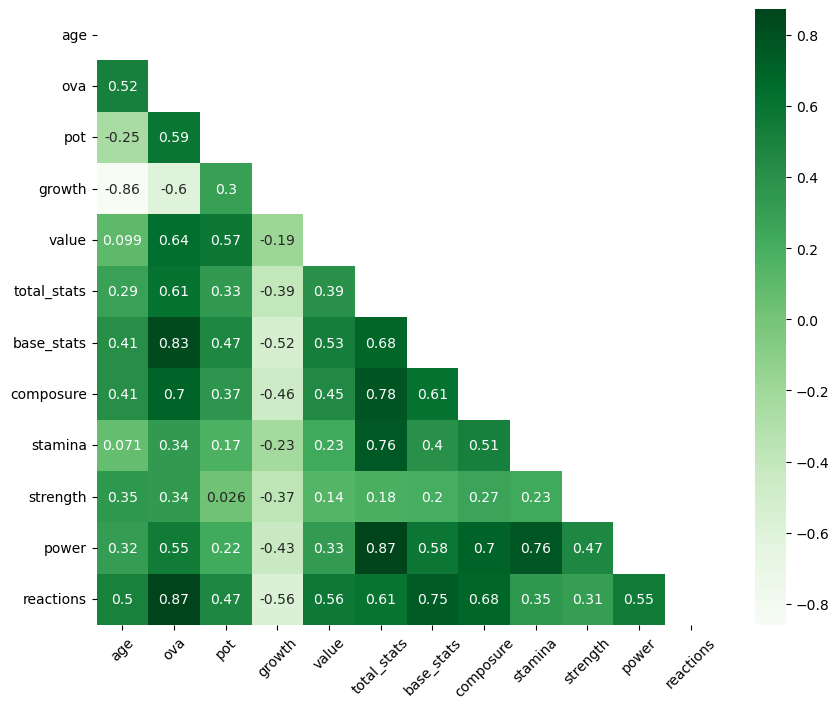

In [14]:

correlations_matrix = num_data.corr()  # method='spearman'


mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap="Greens")
plt.xticks(rotation=45)
plt.show()

##### the value of the player will be irrelevant to our next steps towards modelling, so we will drop it for now

In [31]:
num_data = num_data.drop('value', axis = 1)
num_data

age  ova  pot  growth  total_stats  base_stats  composure  stamina  \
0       33   69   69       0         1929         408       61.0       69   
1       37   71   71       0         1906         385       79.0       64   
2       33   71   71       0         1770         354       61.0       29   
4       36   81   81       0         2014         420       89.0       58   
5       27   66   70       4         1649         360       61.0       64   
...    ...  ...  ...     ...          ...         ...        ...      ...   
17120   22   64   69       5         1367         302       46.0       59   
17121   18   56   66      10         1529         319       46.0       53   
17122   18   56   67      11         1430         303       43.0       53   
17123   20   62   73      11         1579         335       54.0       57   
17124   18   59   74      15         1401         295       57.0       55   

       strength  power  reactions  
0            68    347         69  
1            60    324         65  
2            56    284         59  
4            62    297         75  
5            61    315         65  
...         ...    ...        ...  
17120        74    279         48  
17121        57    271         54  
17122        54    233         59  
17123        48    261         56  
17124        52    288         53  

[17036 rows x 11 columns]

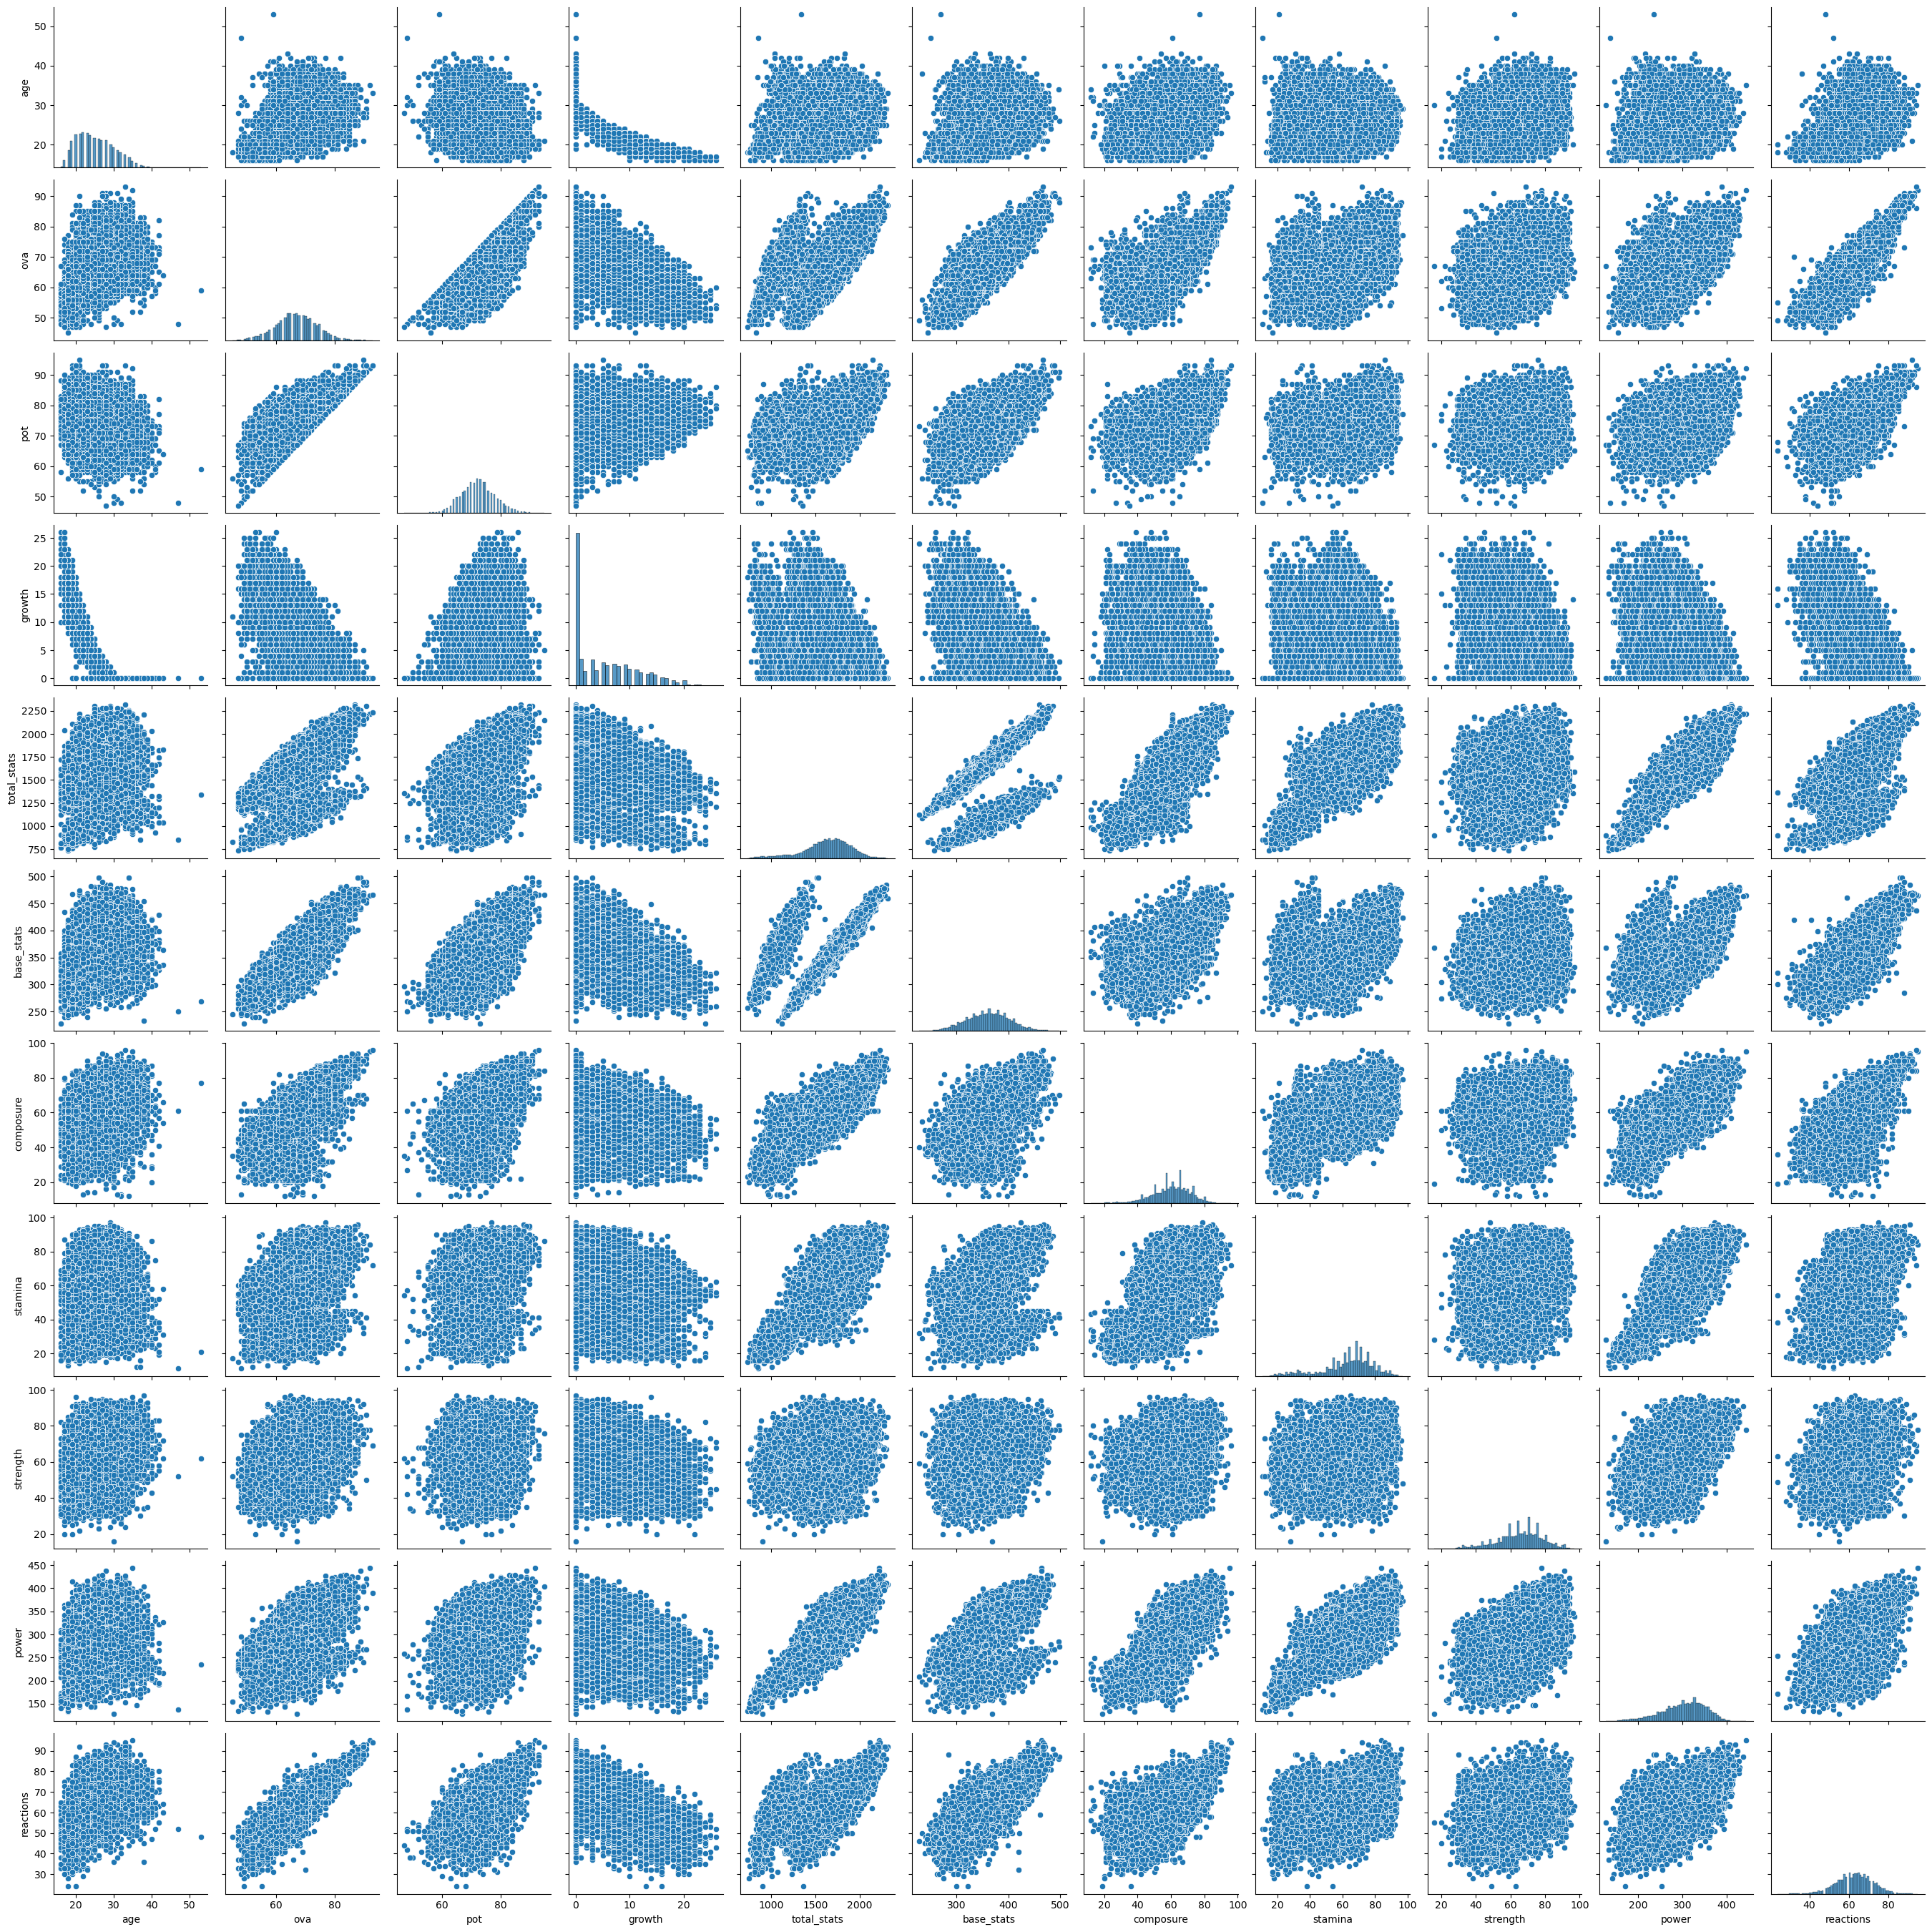

In [32]:
sns.pairplot(num_data)
plt.show()

we can identify a lot of positive correlations 

# Remember we want to predict OVA who is the best player

check how attacking work is seen in the data frame

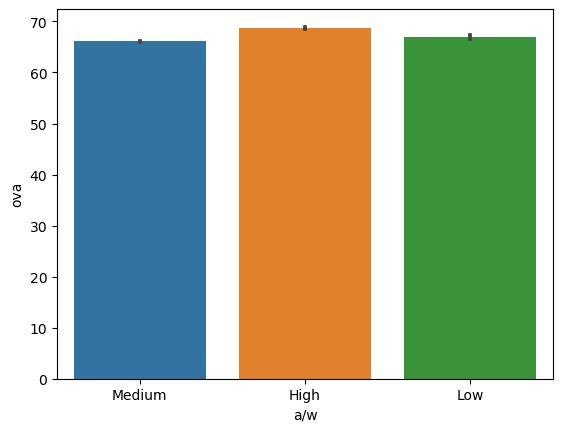

In [33]:

sns.barplot(x='a/w', y = 'ova', data = data) 
plt.show()

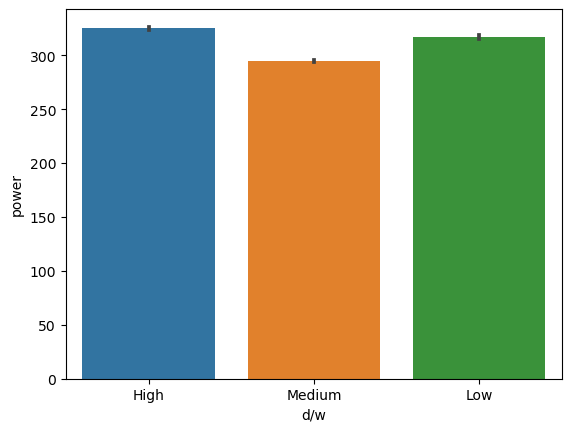

In [34]:
sns.barplot(x='d/w', y ="power", data = data) 
plt.show()

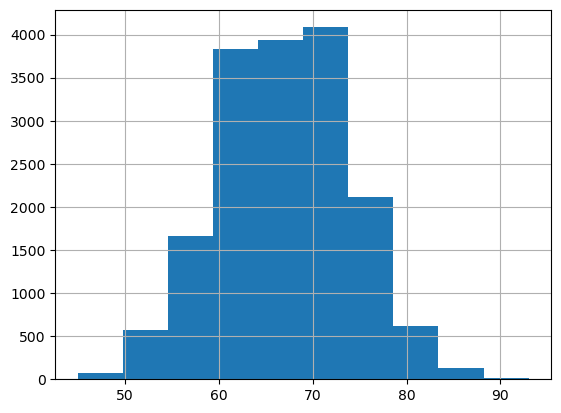

In [35]:
data['ova'].hist() #OVA overall rating of players
plt.show() 

We see in the graph above a lot of the players are qualified as "mediocre" in the overall rating , as the max rating a player can achieve is 100.
the distribution follows an almost perfect normal distribution.

In [36]:
def dist_bundle(num_data):
    for column in num_data.columns:
        sns.distplot(num_data[column])
        plt.show()
    return num_data


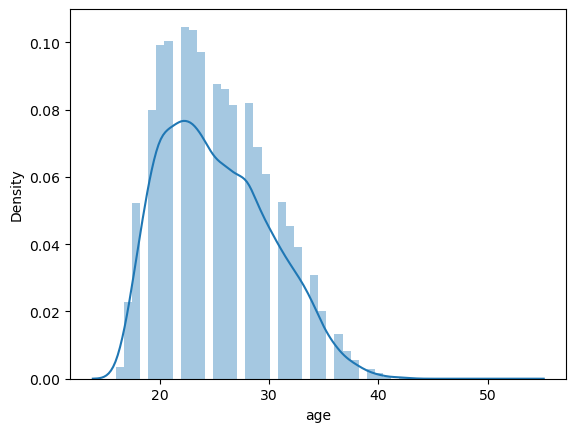

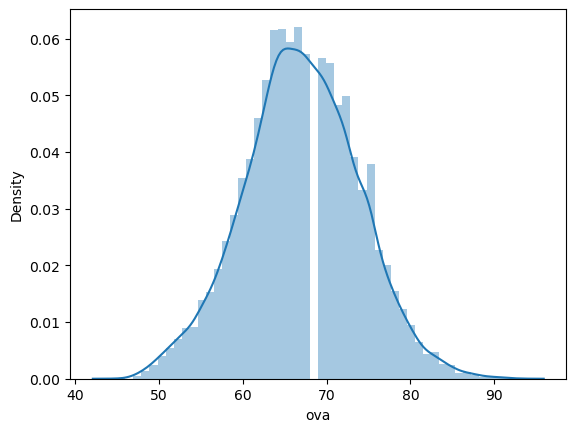

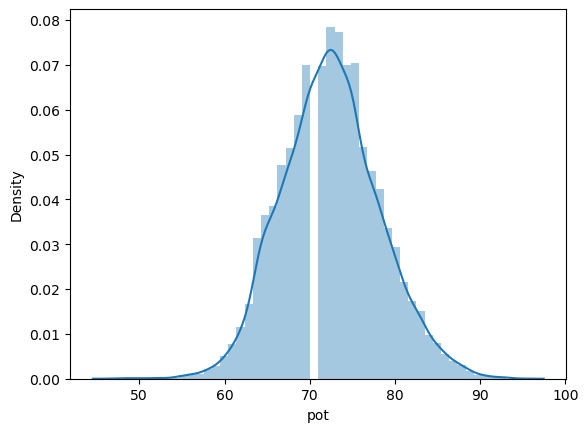

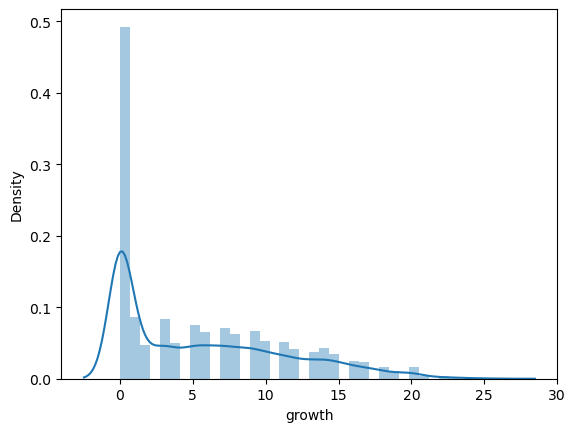

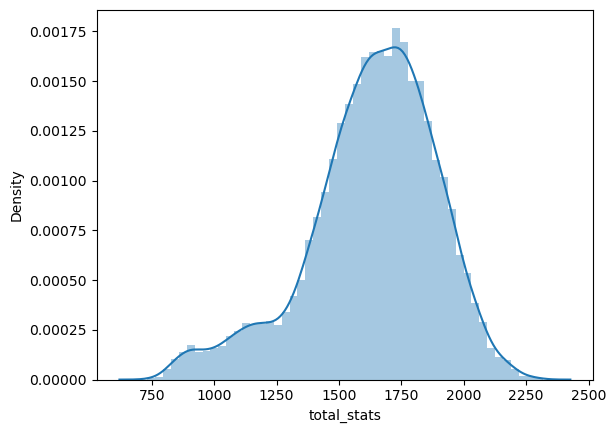

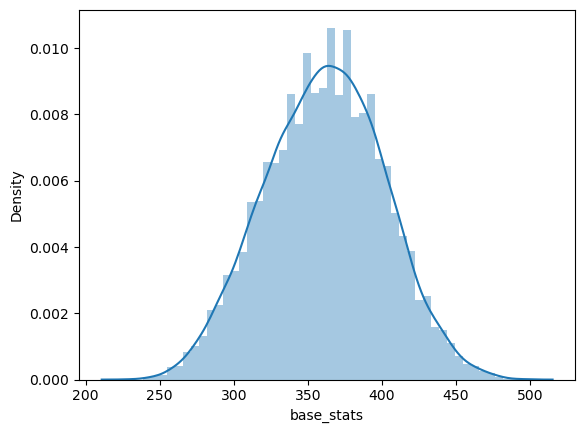

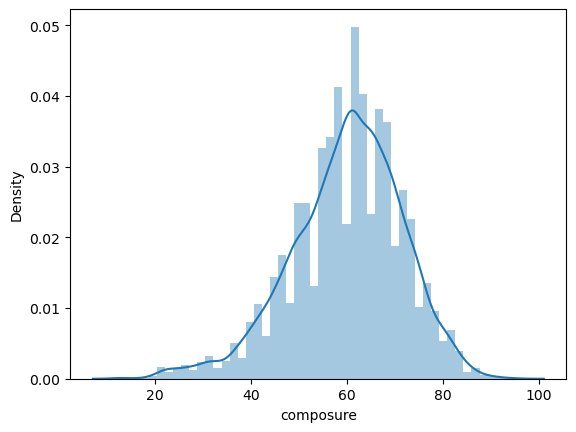

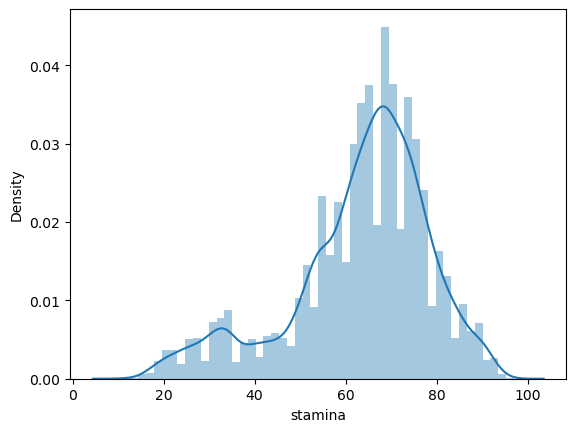

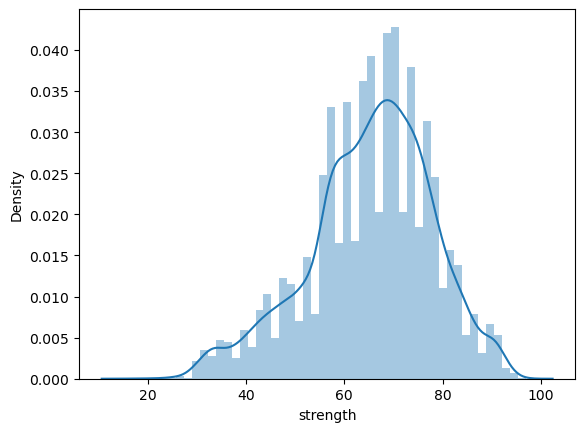

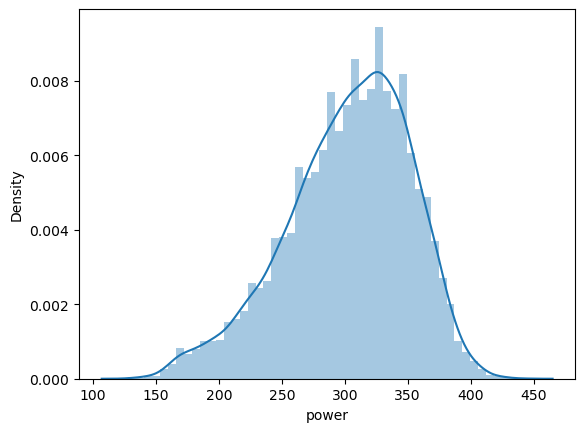

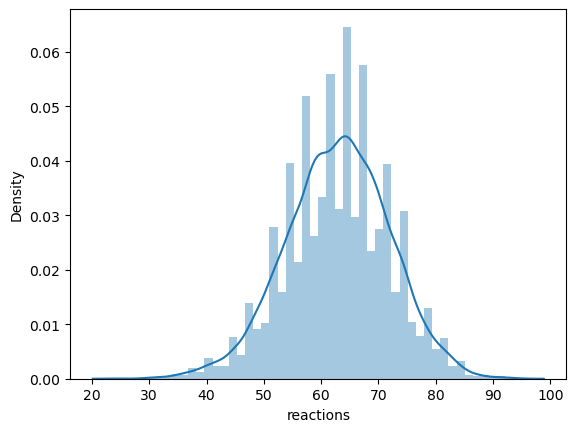

age  ova  pot  growth  total_stats  base_stats  composure  stamina  \
0       33   69   69       0         1929         408       61.0       69   
1       37   71   71       0         1906         385       79.0       64   
2       33   71   71       0         1770         354       61.0       29   
4       36   81   81       0         2014         420       89.0       58   
5       27   66   70       4         1649         360       61.0       64   
...    ...  ...  ...     ...          ...         ...        ...      ...   
17120   22   64   69       5         1367         302       46.0       59   
17121   18   56   66      10         1529         319       46.0       53   
17122   18   56   67      11         1430         303       43.0       53   
17123   20   62   73      11         1579         335       54.0       57   
17124   18   59   74      15         1401         295       57.0       55   

       strength  power  reactions  
0            68    347         69  
1            60    324         65  
2            56    284         59  
4            62    297         75  
5            61    315         65  
...         ...    ...        ...  
17120        74    279         48  
17121        57    271         54  
17122        54    233         59  
17123        48    261         56  
17124        52    288         53  

[17036 rows x 11 columns]

In [37]:
dist_bundle(num_data)

In [38]:
num_data.describe().round(2)

age       ova       pot    growth  total_stats  base_stats  \
count  17036.00  17036.00  17036.00  17036.00     17036.00    17036.00   
mean      25.25     66.95     72.46      5.51      1632.19      361.29   
std        4.92      6.84      5.74      5.79       259.98       40.19   
min       16.00     45.00     47.00      0.00       731.00      228.00   
25%       21.00     62.00     69.00      0.00      1493.00      333.00   
50%       25.00     67.00     72.00      4.00      1660.00      362.00   
75%       29.00     72.00     76.00      9.00      1812.00      389.00   
max       53.00     93.00     95.00     26.00      2316.00      498.00   

       composure   stamina  strength     power  reactions  
count   17036.00  17036.00  17036.00  17036.00   17036.00  
mean       59.96     63.31     65.30    302.60      62.91  
std        11.64     15.33     12.62     49.28       9.02  
min        12.00     11.00     16.00    128.00      24.00  
25%        53.00     56.00     58.00    272.00      57.00  
50%        61.00     66.00     67.00    308.00      63.00  
75%        68.00     74.00     74.00    339.00      69.00  
max        96.00     97.00     97.00    444.00      95.00

1. youngest player 16 ; oldest 53
2. lowest OVA recorded is 38 ; highest 93
3. lowest total stats 731 ; highest 2316

# Pre-processing

## - outlier removal

In [39]:
# a fast way to create boxplots for all the variables I want to examine

def box_bundle(trans_df):
    for column in trans_df.columns:
        sns.boxplot(trans_df[column] ,whis=1.5)
        plt.show()

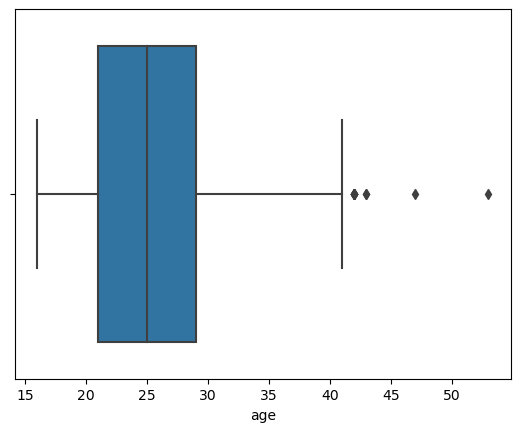

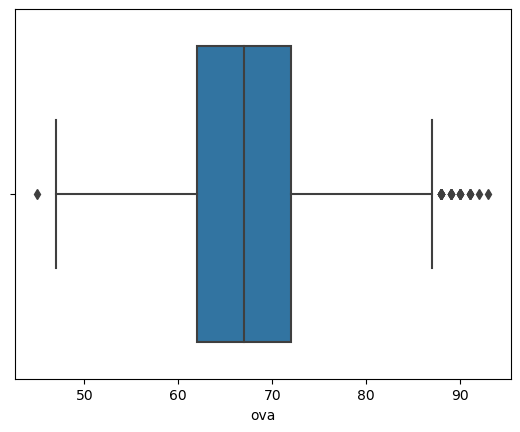

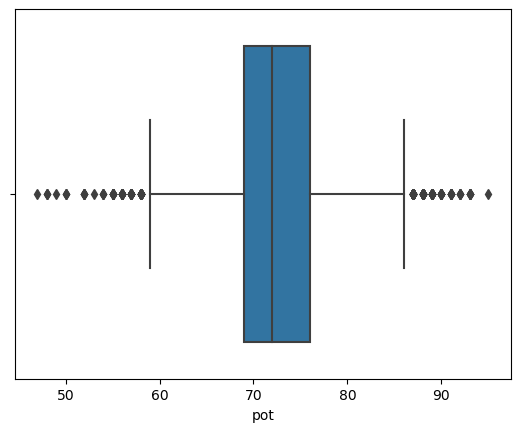

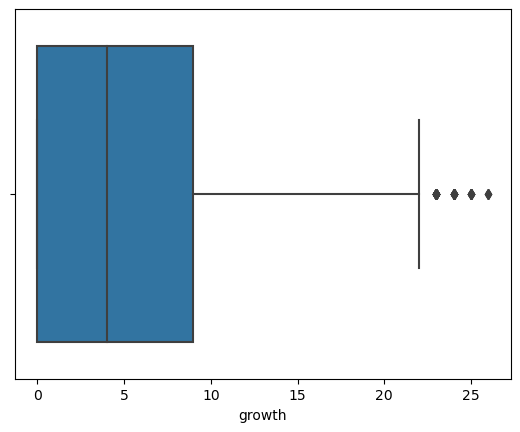

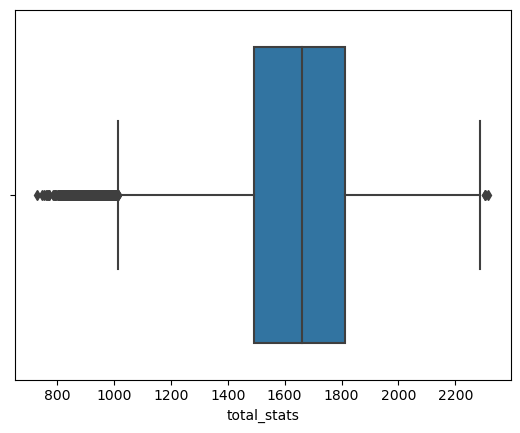

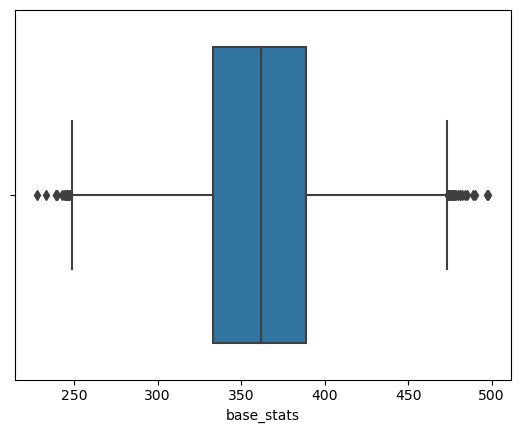

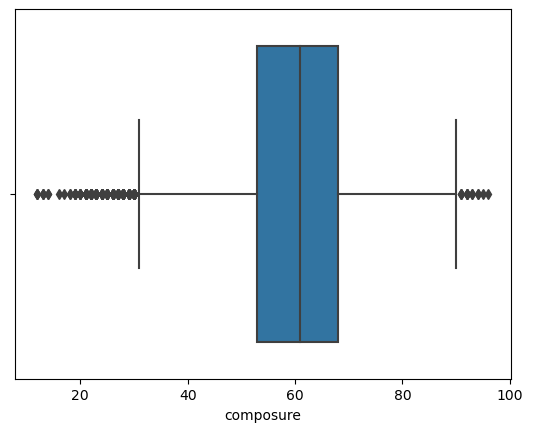

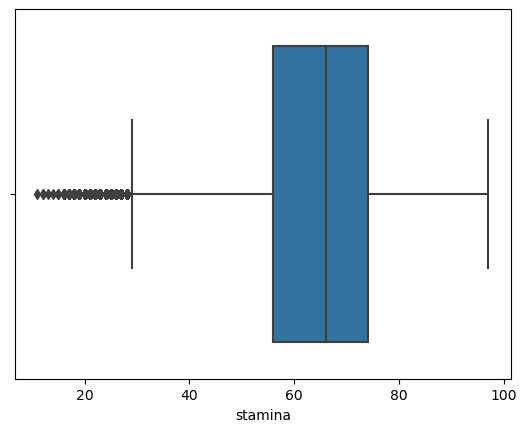

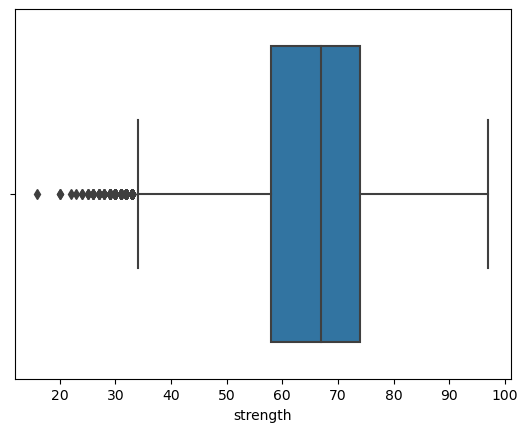

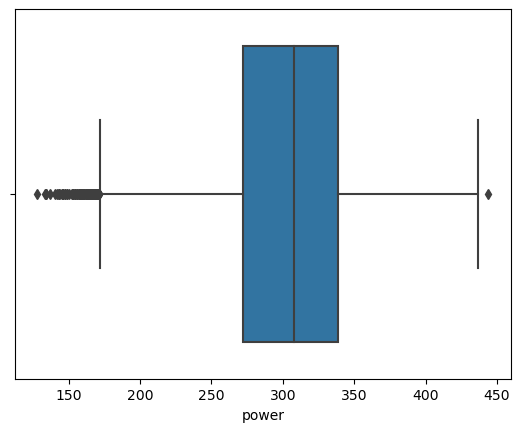

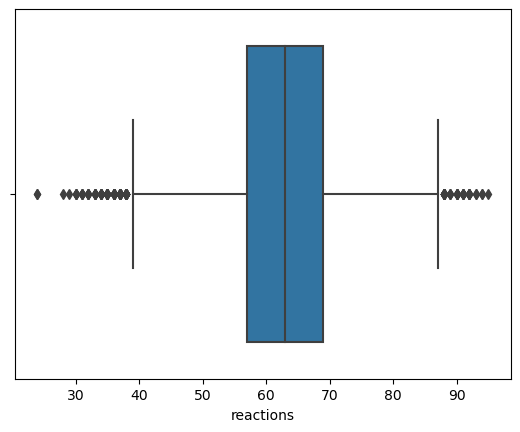

In [40]:
box_bundle(num_data)

In [41]:
data1 = num_data.copy()

In [42]:
# a fast way to deal with outliers
whis_ = 1.5     # just a random value to trick python into considering it a defined value
column = 'age'      # same as above

def outlier_splicer1(data):
    iqr = np.percentile(data[column],75) - np.percentile(data[column],25)
    upper_limit = np.percentile(data[column],75) + whis_*iqr
    lower_limit = np.percentile(data[column],25) - whis_*iqr
    data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

(17016, 11)


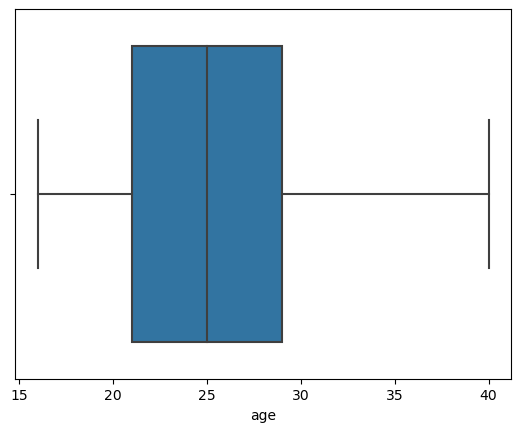

In [43]:
whis_ = 1.5
column = 'age'

data1 = outlier_splicer1(data1)
data = outlier_splicer1(data)       # making the same changes to the original set in order not to lose our system of reference (id, name, value)
sns.boxplot(data1['age'] ,whis=1.5)
print(data1.shape)
plt.show()

### *If I remove outliers from ova, around 50 values get removed*

whis_ = 1.5
column = 'ova'

data1 = outlier_splicer1(data1)
data = outlier_splicer1(data)
sns.boxplot(data2['ova'] ,whis=1.5)
print(data2.shape)
plt.show()

(17008, 11)


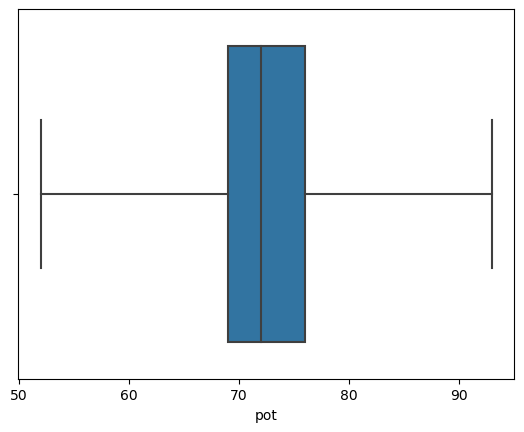

In [44]:
whis_ = 2.5
column = 'pot'

data2 = outlier_splicer1(data1)
data = outlier_splicer1(data)
sns.boxplot(data2['pot'] ,whis=2.5)
print(data2.shape)
plt.show()

(17008, 11)


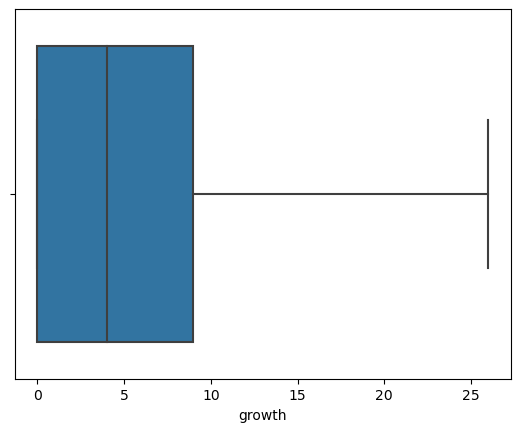

In [45]:
whis_ = 2
column = 'growth'

data2 = outlier_splicer1(data2)
data = outlier_splicer1(data)
sns.boxplot(data2['growth'] ,whis=2)
print(data2.shape)
plt.show()

(17008, 11)


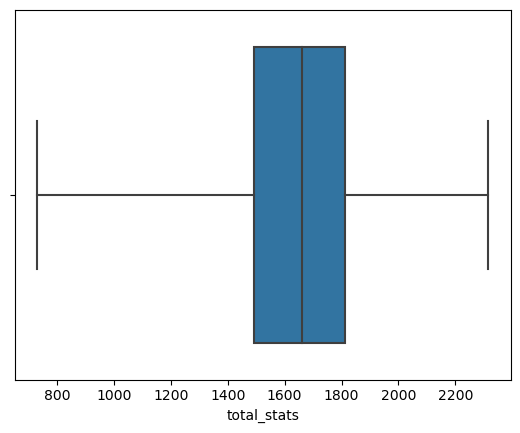

In [46]:
whis_ = 2.5
column = 'total_stats'

data3 = outlier_splicer1(data2)
#data = outlier_splicer1(data)
sns.boxplot(data3['total_stats'] ,whis=2.5)
print(data3.shape)
plt.show()


(17008, 11)


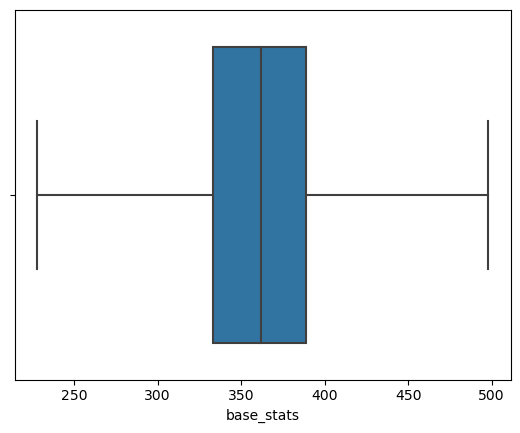

In [47]:
whis_ = 2
column = 'base_stats'

data4 = outlier_splicer1(data3)
data = outlier_splicer1(data)
sns.boxplot(data4['base_stats'] ,whis=2)
print(data4.shape)
plt.show()

#### ***Removing outliers from composure feature breaks the set and returns an empty one***

(17008, 11)


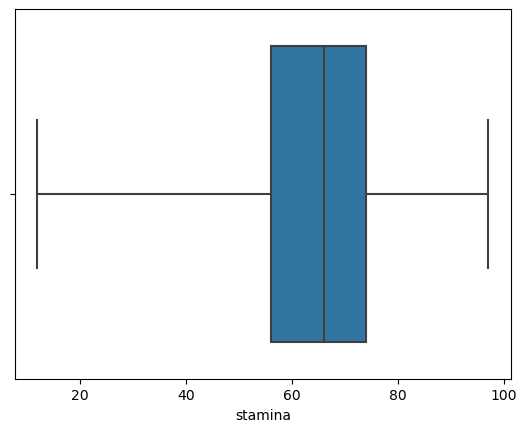

In [48]:
whis_ = 2.5
column = 'stamina'

data5 = outlier_splicer1(data4)
data = outlier_splicer1(data)
sns.boxplot(data5['stamina'] ,whis=2.5)
print(data5.shape)
plt.show()

(17007, 11)


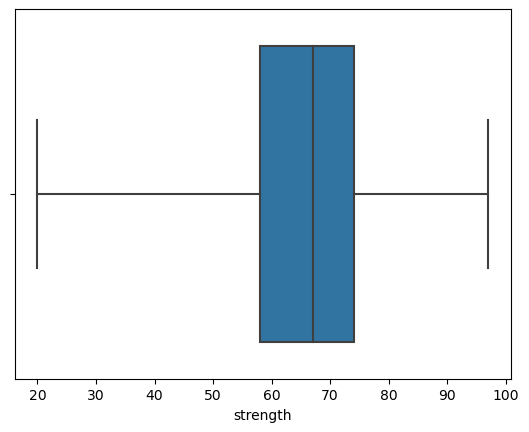

In [49]:
whis_ = 2.5
column = 'strength'

data6 = outlier_splicer1(data5)
data = outlier_splicer1(data)
sns.boxplot(data6['strength'] ,whis=2.5)
print(data6.shape)
plt.show()

(17004, 11)


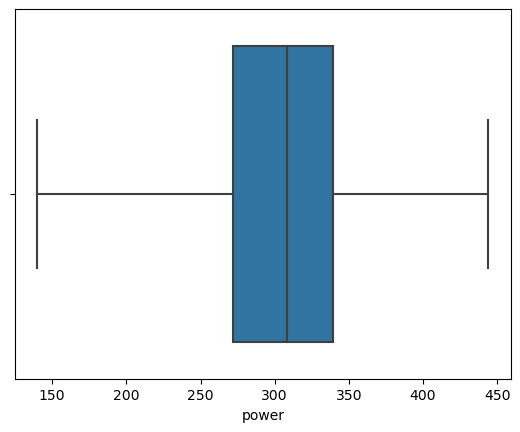

In [50]:
whis_ = 2
column = 'power'

data7 = outlier_splicer1(data6)
data = outlier_splicer1(data)
sns.boxplot(data7['power'] ,whis=2)
print(data7.shape)
plt.show()

(17002, 11)


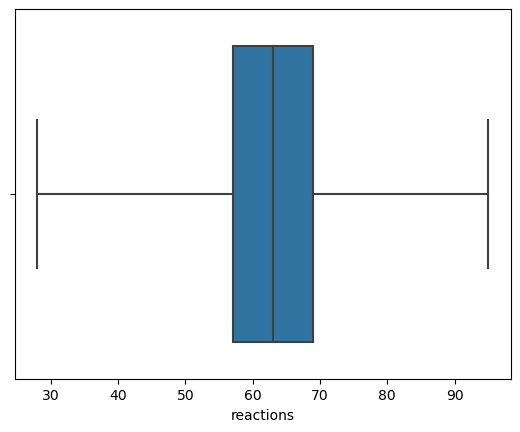

In [51]:
whis_ = 2.5
column = 'reactions'

data8 = outlier_splicer1(data7)
data = outlier_splicer1(data)
sns.boxplot(data8['reactions'] ,whis=2.5)
print(data8.shape)
plt.show()

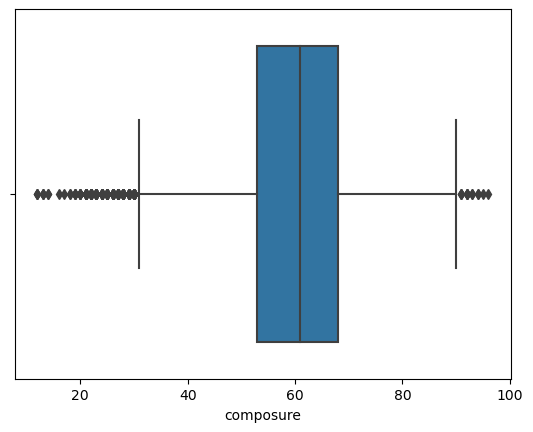

In [52]:
sns.boxplot(data8['composure'] ,whis=1.5)
plt.show()

In [53]:
data8

age  ova  pot  growth  total_stats  base_stats  composure  stamina  \
0       33   69   69       0         1929         408       61.0       69   
1       37   71   71       0         1906         385       79.0       64   
2       33   71   71       0         1770         354       61.0       29   
4       36   81   81       0         2014         420       89.0       58   
5       27   66   70       4         1649         360       61.0       64   
...    ...  ...  ...     ...          ...         ...        ...      ...   
17120   22   64   69       5         1367         302       46.0       59   
17121   18   56   66      10         1529         319       46.0       53   
17122   18   56   67      11         1430         303       43.0       53   
17123   20   62   73      11         1579         335       54.0       57   
17124   18   59   74      15         1401         295       57.0       55   

       strength  power  reactions  
0            68    347         69  
1            60    324         65  
2            56    284         59  
4            62    297         75  
5            61    315         65  
...         ...    ...        ...  
17120        74    279         48  
17121        57    271         54  
17122        54    233         59  
17123        48    261         56  
17124        52    288         53  

[17002 rows x 11 columns]

#### - **117 rows removed as outliers**

## -transformation

1. minmax

In [54]:
X = data8        # to avoid changing X to num_data in all the following cells, but it will be redefined after transformation to exclude our target feature

In [55]:
normal_copy = X.copy()

transformer = MinMaxScaler().fit(normal_copy)  #normalize
x_minmax = transformer.transform(normal_copy)
normal = pd.DataFrame(x_minmax,columns=normal_copy.columns)


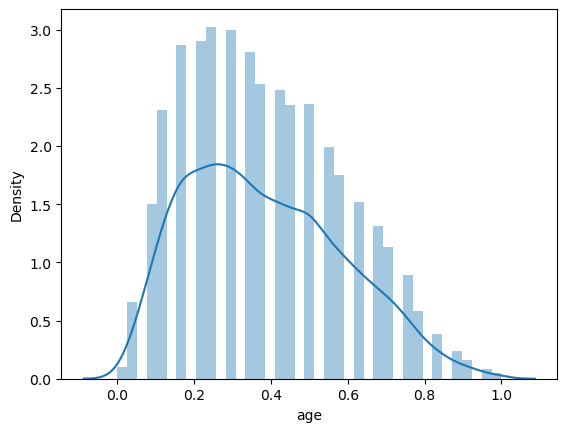

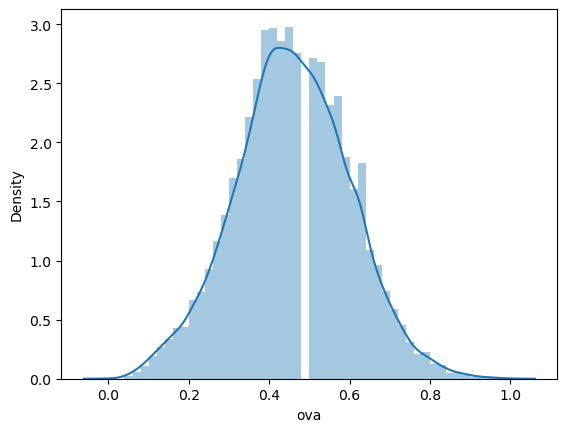

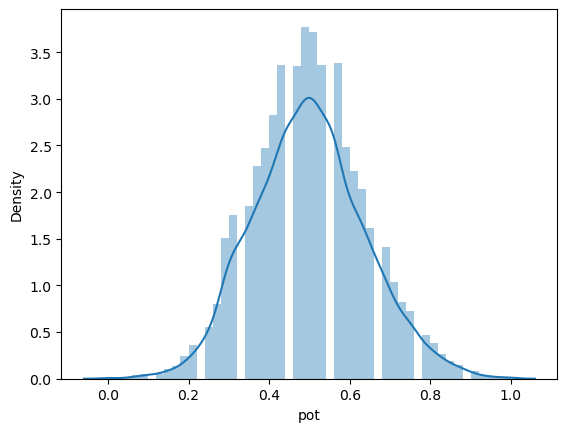

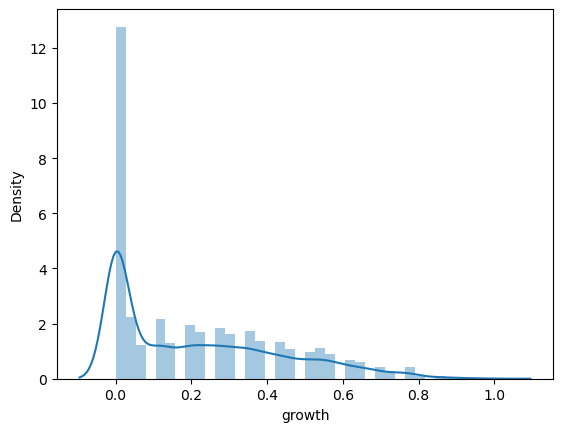

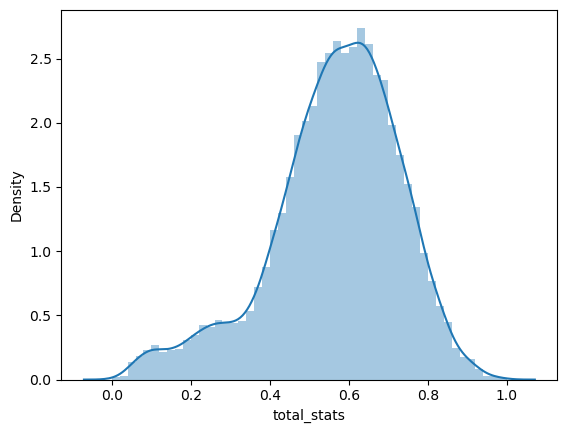

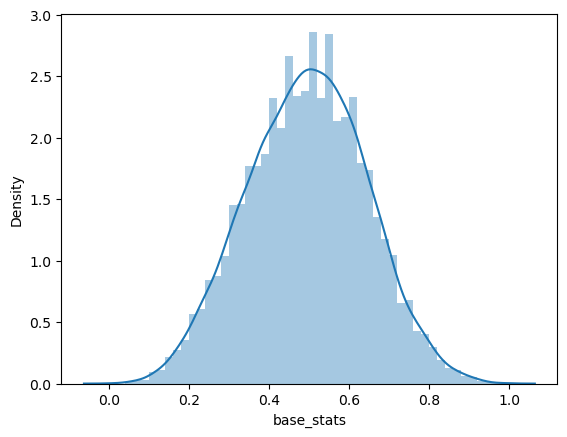

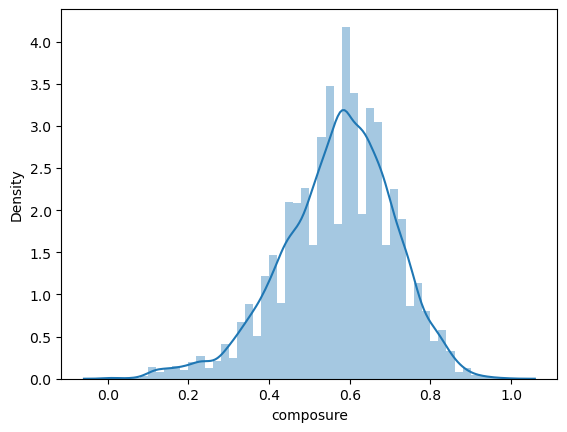

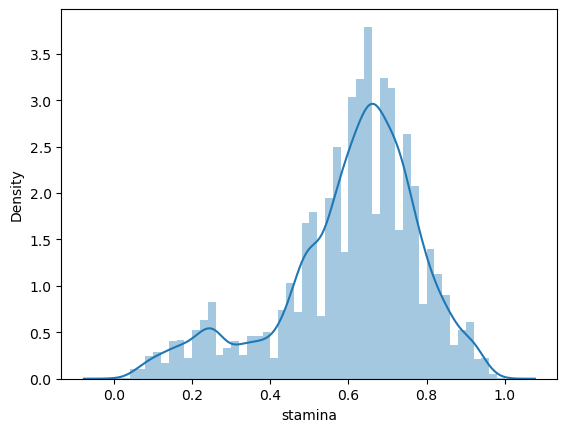

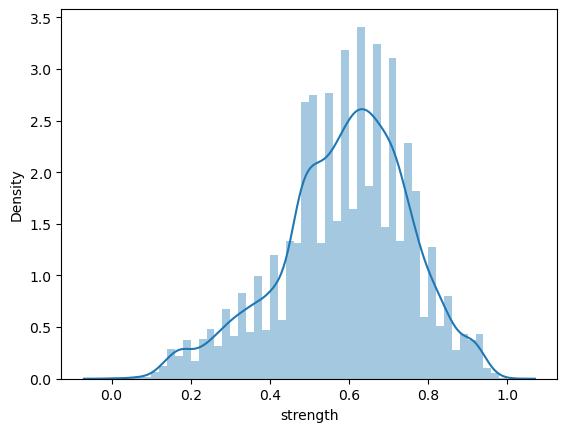

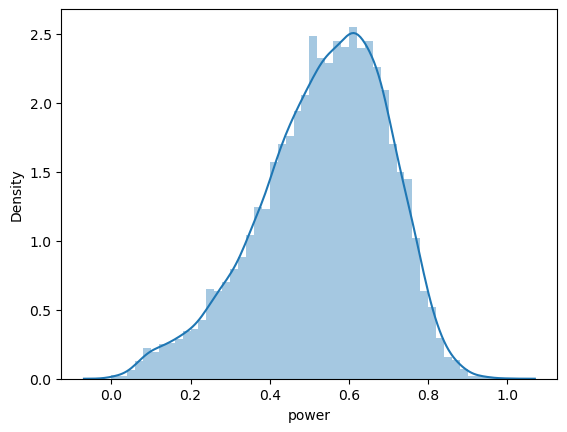

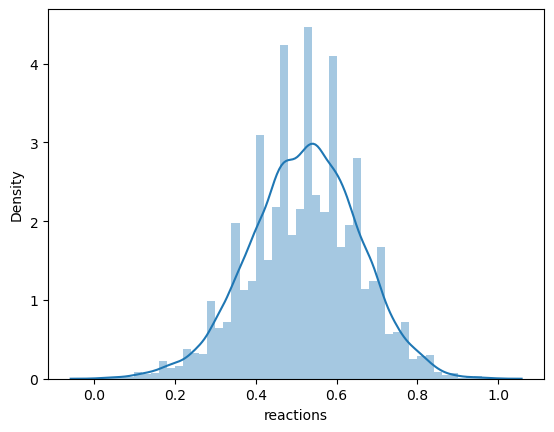

age       ova       pot    growth  total_stats  base_stats  \
0      0.708333  0.500000  0.414634  0.000000     0.753346    0.666667   
1      0.875000  0.541667  0.463415  0.000000     0.738687    0.581481   
2      0.708333  0.541667  0.463415  0.000000     0.652008    0.466667   
3      0.833333  0.750000  0.707317  0.000000     0.807521    0.711111   
4      0.458333  0.437500  0.439024  0.153846     0.574888    0.488889   
...         ...       ...       ...       ...          ...         ...   
16997  0.250000  0.395833  0.414634  0.192308     0.395156    0.274074   
16998  0.083333  0.229167  0.341463  0.384615     0.498407    0.337037   
16999  0.083333  0.229167  0.365854  0.423077     0.435309    0.277778   
17000  0.166667  0.354167  0.512195  0.423077     0.530274    0.396296   
17001  0.083333  0.291667  0.536585  0.576923     0.416826    0.248148   

       composure   stamina  strength     power  reactions  
0       0.583333  0.670588  0.623377  0.680921   0.611940  
1       0.797619  0.611765  0.519481  0.605263   0.552239  
2       0.583333  0.200000  0.467532  0.473684   0.462687  
3       0.916667  0.541176  0.545455  0.516447   0.701493  
4       0.583333  0.611765  0.532468  0.575658   0.552239  
...          ...       ...       ...       ...        ...  
16997   0.404762  0.552941  0.701299  0.457237   0.298507  
16998   0.404762  0.482353  0.480519  0.430921   0.388060  
16999   0.369048  0.482353  0.441558  0.305921   0.462687  
17000   0.500000  0.529412  0.363636  0.398026   0.417910  
17001   0.535714  0.505882  0.415584  0.486842   0.373134  

[17002 rows x 11 columns]

In [56]:
dist_bundle(normal)

2. standardized

In [57]:
stand_copy = X.copy()
transformer = StandardScaler().fit(stand_copy) #standerdize
x_standardized = transformer.transform(stand_copy)

In [58]:
standard = pd.DataFrame(x_standardized, columns=stand_copy.columns)

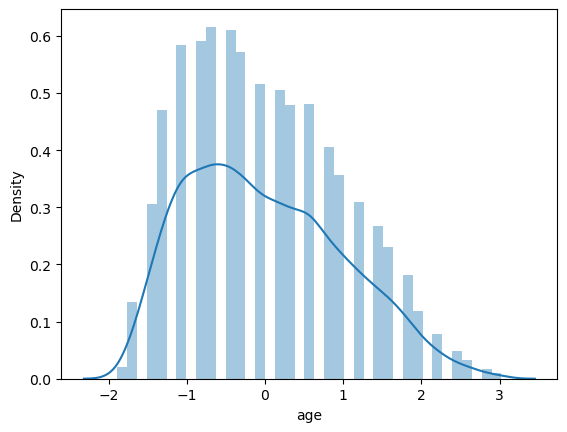

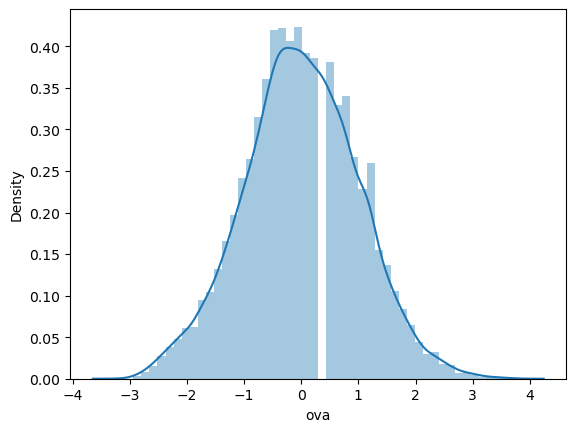

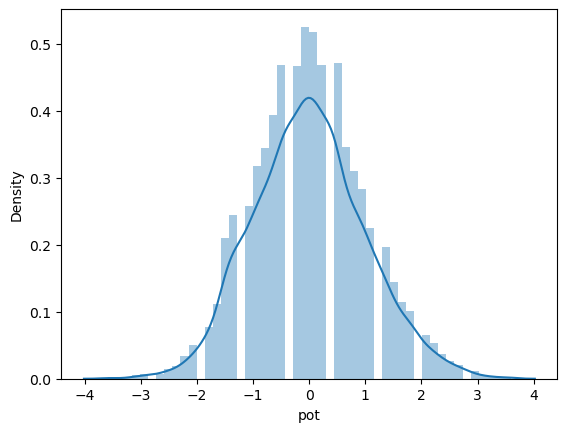

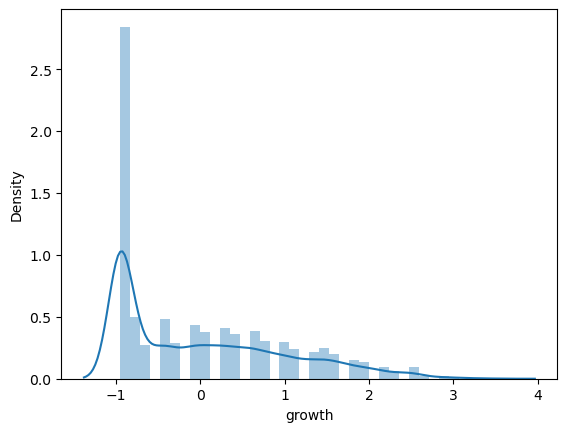

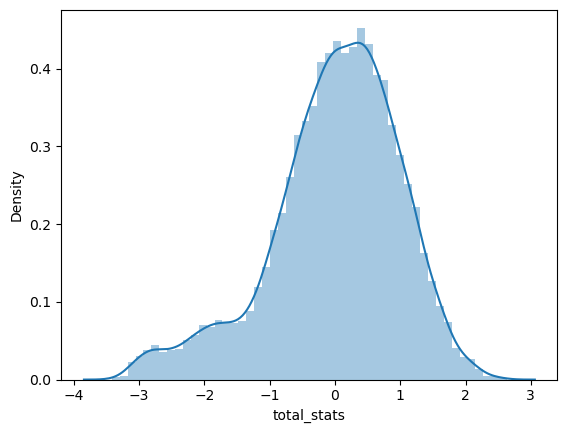

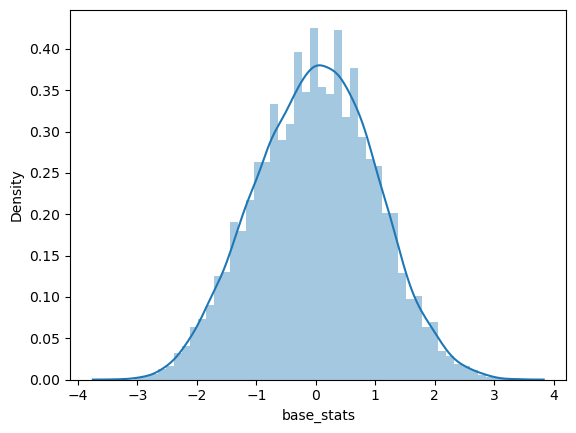

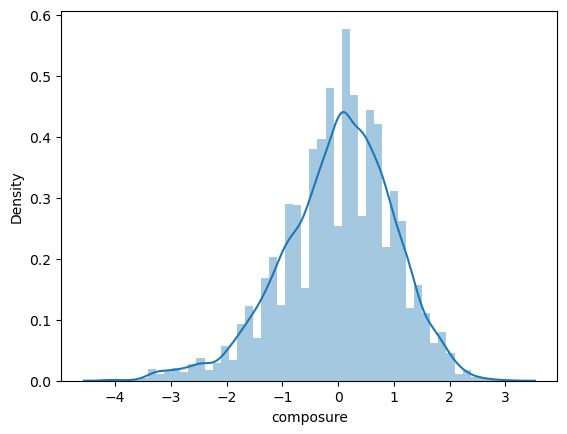

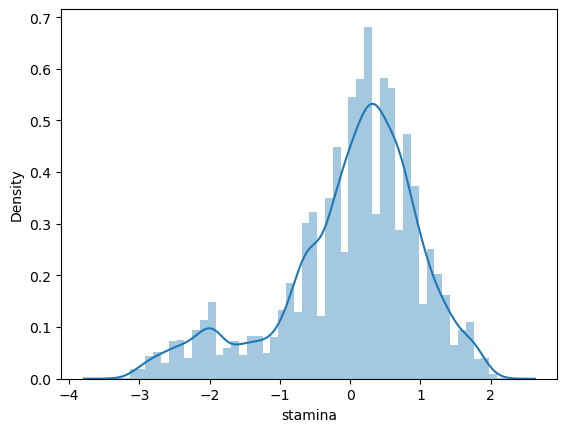

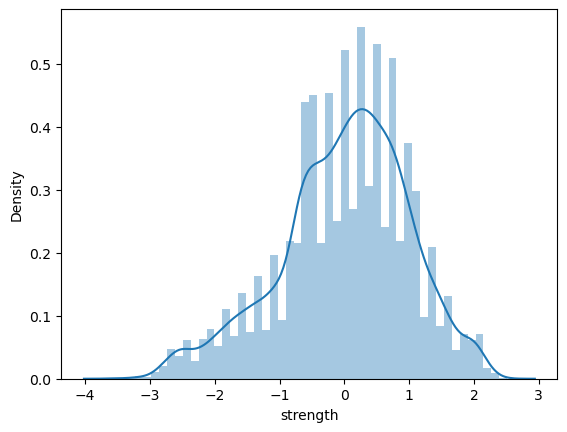

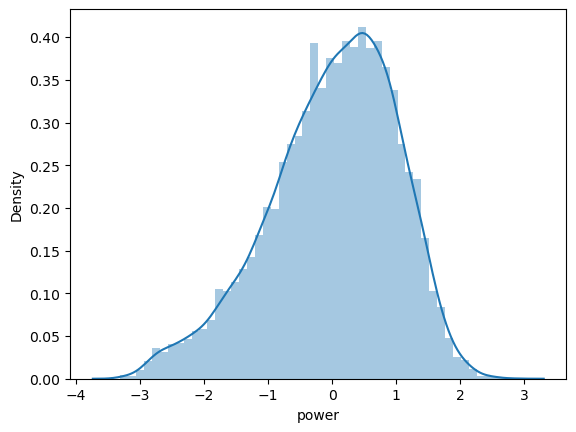

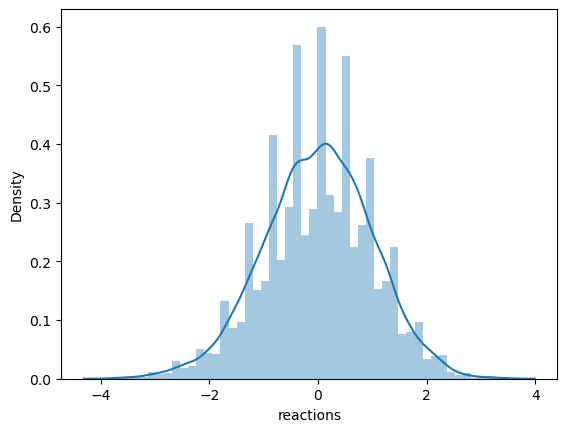

age       ova       pot    growth  total_stats  base_stats  \
0      1.590840  0.298976 -0.609611 -0.953408     1.141915    1.162353   
1      2.409419  0.592022 -0.259242 -0.953408     1.053215    0.589265   
2      1.590840  0.592022 -0.259242 -0.953408     0.528726   -0.183159   
3      2.204774  2.057255  1.492601 -0.953408     1.469721    1.461355   
4      0.362973 -0.140594 -0.434427 -0.262569     0.062085   -0.033657   
...         ...       ...       ...       ...          ...         ...   
16997 -0.660250 -0.433641 -0.609611 -0.089859    -1.025458   -1.478836   
16998 -1.478829 -1.605827 -1.135164  0.773689    -0.400699   -1.055249   
16999 -1.478829 -1.605827 -0.959980  0.946398    -0.782497   -1.453919   
17000 -1.069540 -0.726687  0.091126  0.946398    -0.207873   -0.656579   
17001 -1.478829 -1.166257  0.266311  1.637237    -0.894336   -1.653254   

       composure   stamina  strength     power  reactions  
0       0.088142  0.368847  0.213582  0.900639   0.675041  
1       1.637776  0.041653 -0.420544  0.432618   0.230651  
2       0.088142 -2.248705 -0.737608 -0.381333  -0.435935  
3       2.498684 -0.350980 -0.262013 -0.116799   1.341626  
4       0.088142  0.041653 -0.341279  0.249479   0.230651  
...          ...       ...       ...       ...        ...  
16997  -1.203221 -0.285541  0.689177 -0.483077  -1.658008  
16998  -1.203221 -0.678174 -0.658342 -0.645867  -0.991423  
16999  -1.461493 -0.678174 -0.896139 -1.419119  -0.435935  
17000  -0.514494 -0.416419 -1.371734 -0.849354  -0.769228  
17001  -0.256222 -0.547296 -1.054671 -0.299938  -1.102520  

[17002 rows x 11 columns]

In [59]:
dist_bundle(standard)

3. box cox

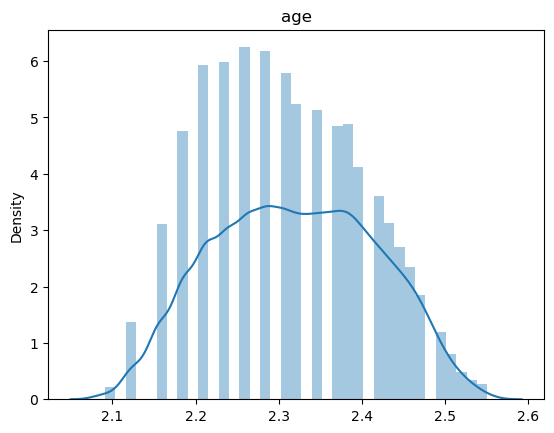

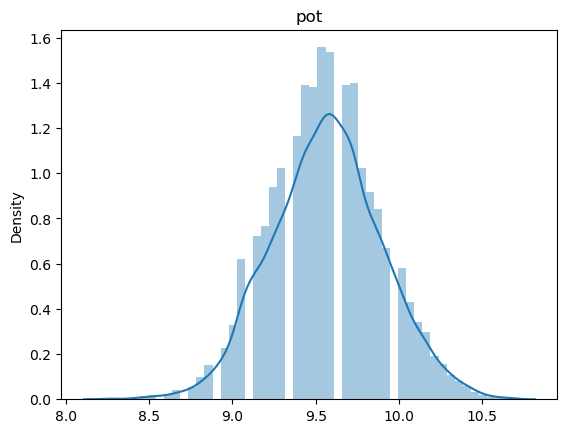

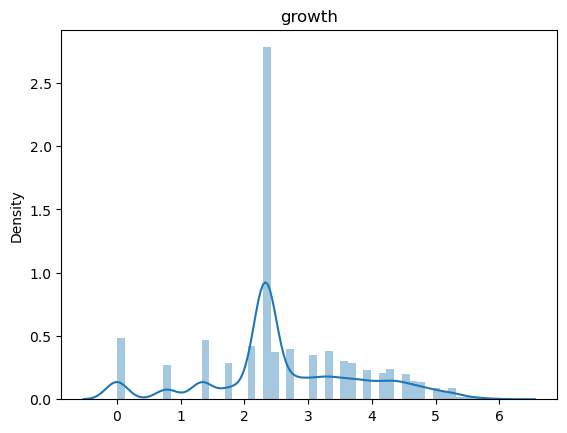

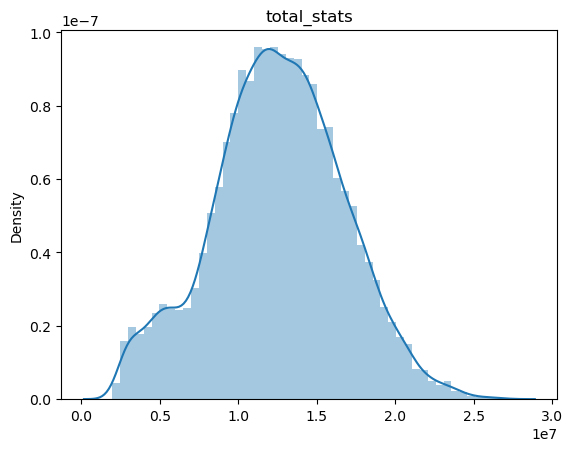

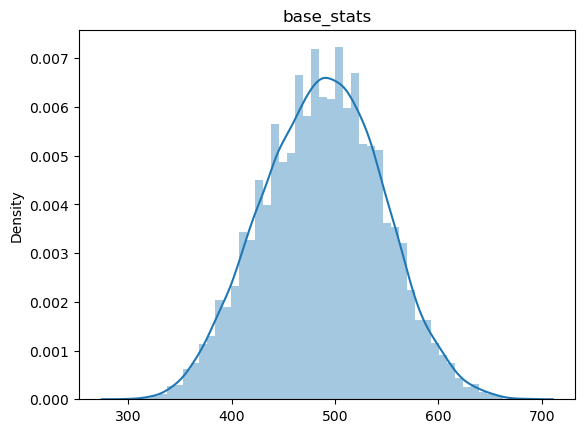

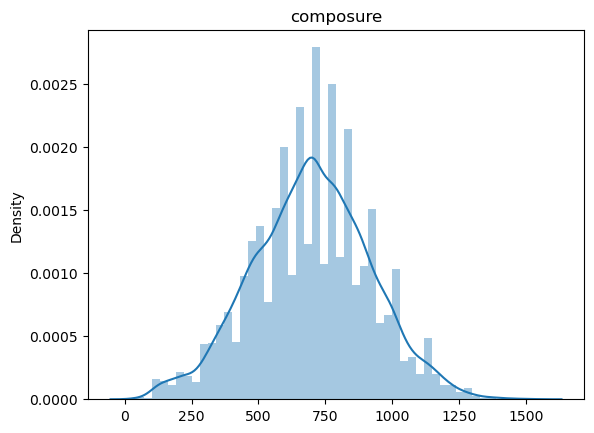

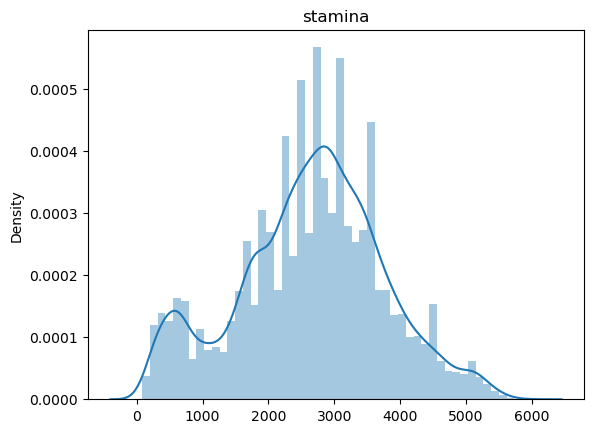

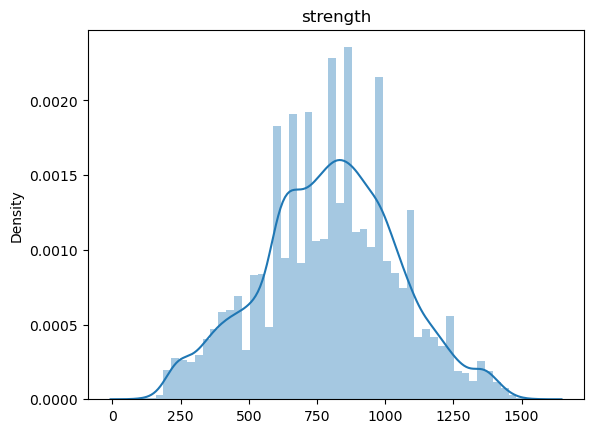

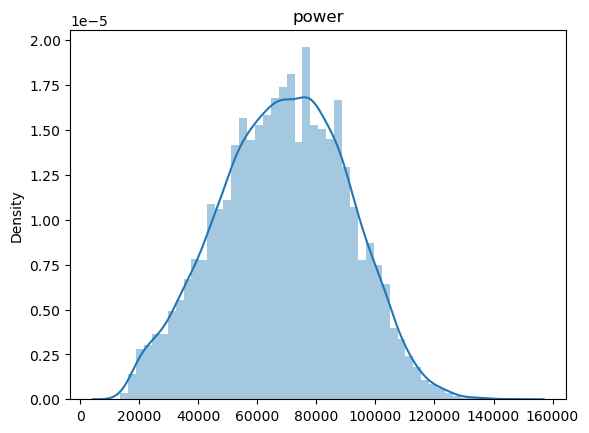

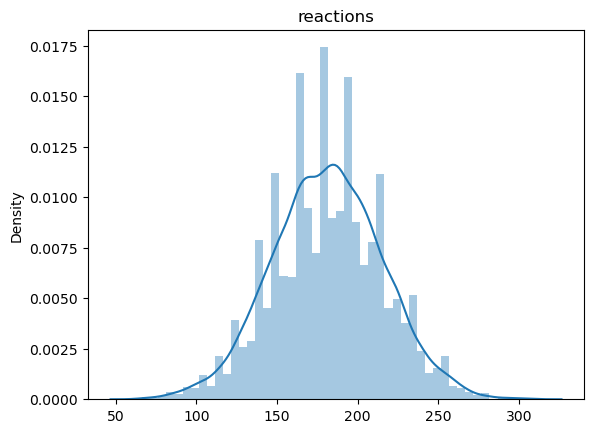

In [60]:
box_copy = X.copy()
i = 0


for column in box_copy.columns:
    if column!='ova':     # as above
        box_copy[column] = np.where(X[column]<=0, np.NAN, X[column]) # data['HV1'].mean()
        box_copy[column] = box_copy[column].fillna(X[column].mean())
        t_data, _ci = stats.boxcox(box_copy[column])
        n = box_copy.columns[i]
        i += 1
        sns.distplot(t_data).set_title(n)
        plt.show()
    else:
        i += 1
    

4. log trans

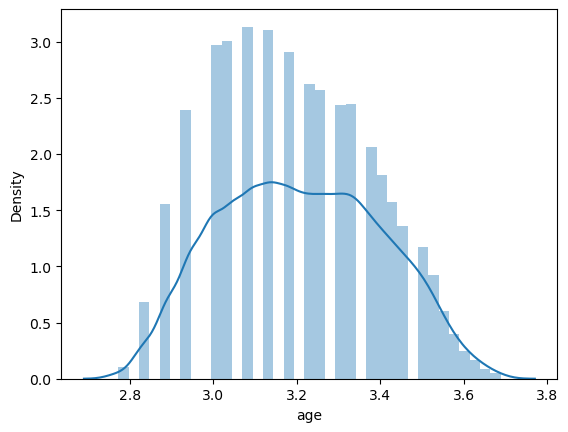

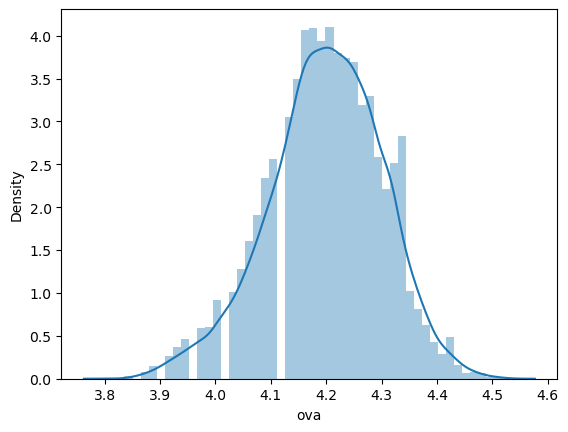

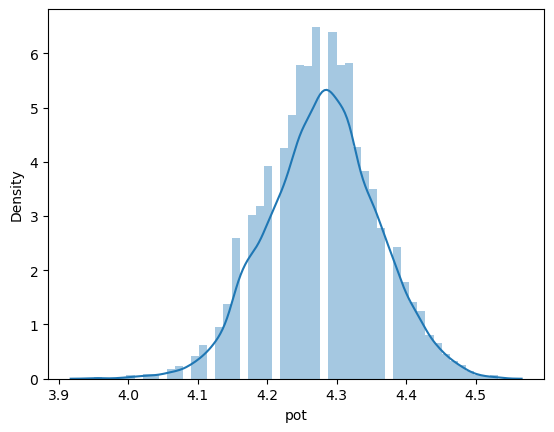

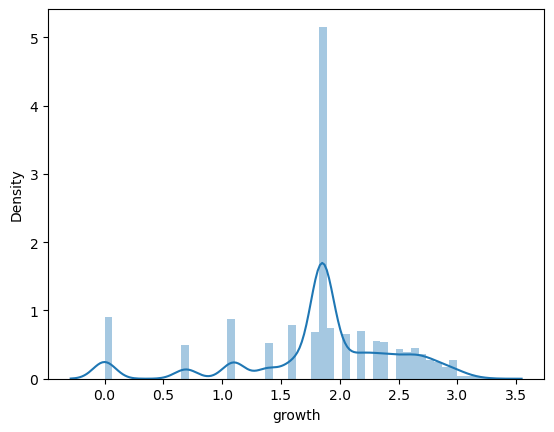

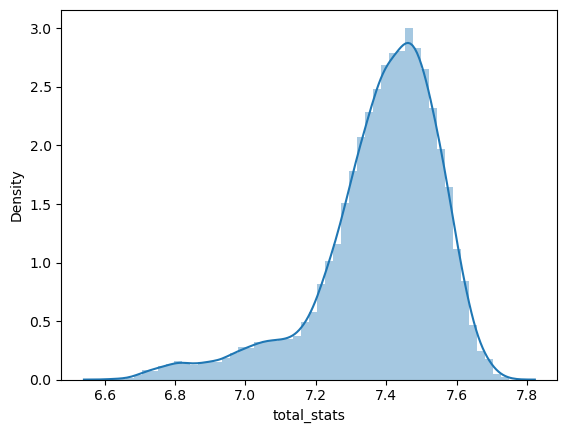

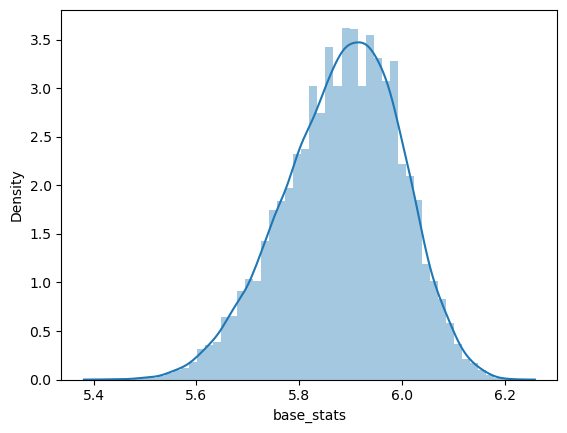

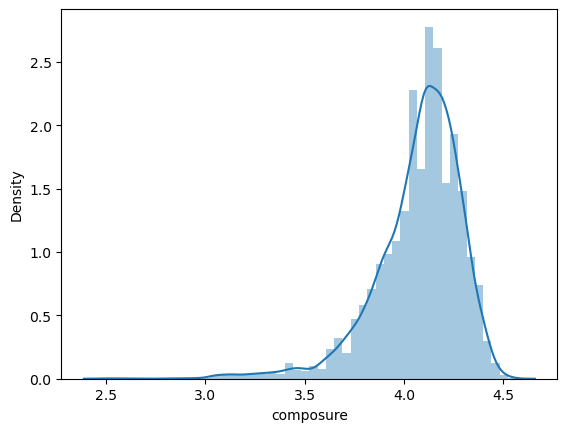

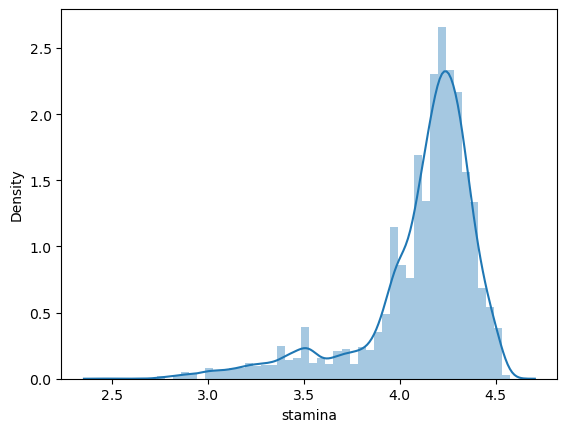

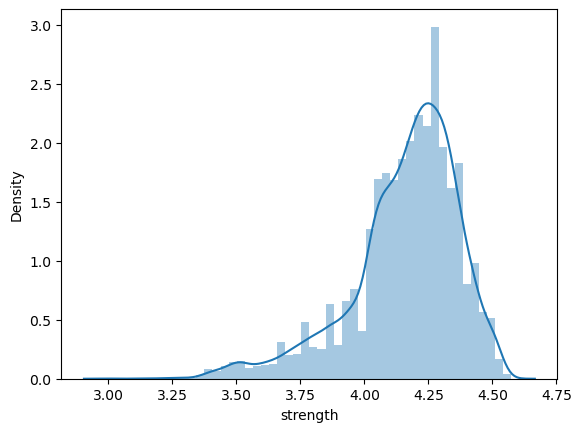

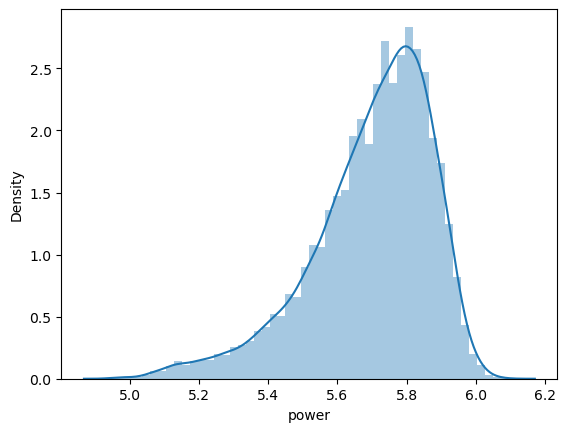

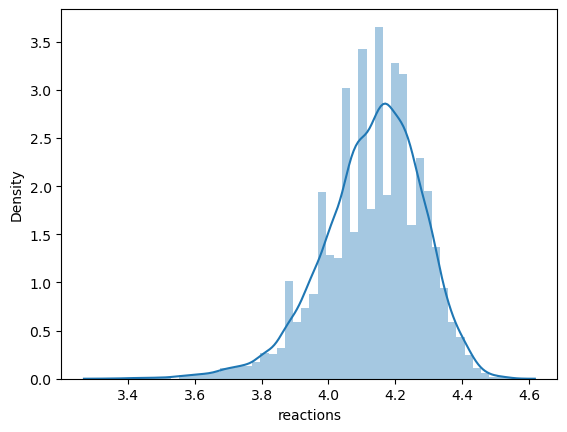

In [61]:

log_copy = X.copy()

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

#for column in nums.columns:
#    nums[column] = nums[column].apply(log_transfom_clean)

for column in log_copy.columns:
    log_copy[column] = list(map(log_transfom_clean, log_copy[column]))
    log_copy[column] = log_copy[column].fillna(np.mean(log_copy[column]))
    sns.distplot(log_copy[column])
    plt.show()



In [62]:
# a function to let me decide how I want to transform my columns one by one

X_num = data8

def preparation1(df):
    for column in X_num:
        print(column)
        change_q = input("Should column be normalised/standardised? (Y/N): ")
        while change_q == "Y":
            pick_one = input("Select number" "\n"
                            "1: minmax" "\n"
                            "2: Log transformation" "\n"
                            "3: Box-Cox transformation" "\n"
                            "4: Standardization" "\n")
            if pick_one == "1":
                transformer = MinMaxScaler().fit(X_num[[column]])
                X_num_col_minmax = transformer.transform(X_num[[column]])
                X_num[column] = X_num_col_minmax
                break
            elif pick_one == "2":
                X_num[column] = list(map(log_transfom_clean, X_num[column]))
                X_num[column] = X_num[column].fillna(np.mean(X_num[column]))
                break
            elif pick_one == "3":
                X_num[column] = np.where(X_num[column]<=0, np.NAN, X_num[column])
                X_num[column] = X_num[column].fillna(X_num[column].mean())
                t_data, _ci = stats.boxcox(X_num[column])
                break
            elif pick_one == "4":
                transformer = StandardScaler().fit(X_num[[column]])
                X_num[column] = transformer.transform(X_num[[column]])
                break
            else:
                print("Wrong input. Select from" "\n"
                        "1: minmax" "\n"
                        "2: Log transformation" "\n"
                        "3: Box-Cox transformation" "\n"
                        "4: Standardization")
        if change_q == "N":
            pass
        while change_q!="Y" and change_q!="N":
            print("Wrong input. Please enter Y or N")
            change_q = input("Should column be normalised/standardised? (Y/N): ")
            while change_q == "Y":
                pick_one = input("Select number" "\n"
                                "1: minmax" "\n"
                                "2: Log transformation" "\n"
                                "3: Box-Cox transformation" "\n"
                                "4: Standardization" "\n")
                if pick_one == "1":
                    transformer = MinMaxScaler().fit(X_num[[column]])
                    X_num_col_minmax = transformer.transform(X_num[[column]])
                    X_num[column] = X_num_col_minmax
                    break
                elif pick_one == "2":
                    X_num[column] = list(map(log_transfom_clean, X_num[column]))
                    X_num[column] = X_num[column].fillna(np.mean(X_num[column]))
                    break
                elif pick_one == "3":
                    X_num[column] = np.where(X_num[column]<=0, np.NAN, X_num[column])
                    X_num[column] = X_num[column].fillna(X_num[column].mean())
                    t_data, _ci = stats.boxcox(X_num[column])
                    break
                elif pick_one == "4":
                    transformer = StandardScaler().fit(X_num[[column]])
                    X_num[column] = transformer.transform(X_num[[column]])
                    break
                else:
                    print("Wrong input. Select from" "\n"
                            "1: minmax" "\n"
                            "2: Log transformation" "\n"
                            "3: Box-Cox transformation" "\n"
                            "4: Standardization")
    return X_num


- log: power, total_stats, base_stats, stamina, strength, reactions, power
- box_cox : age, growth, composure
- standardized : pot

In [ ]:
#trans_data = preparation1(data8)

In [ ]:
#num_data = data.drop(['a/w','d/w','name','id'], axis=1)
#num_data.to_csv('num_data_fifa.csv', sep=',', index=False, compression='infer')
#trans_data.to_csv('trans_data_fifa.csv', sep=',', index=False, compression='infer')

In [7]:
num_data = pd.read_csv('num_data_fifa.csv')
num_data

age  ova  bov  pot  growth      value  total_stats  base_stats  \
0       33   69   71   69       0   625000.0         1929         408   
1       37   71   70   71       0   600000.0         1906         385   
2       33   71   71   71       0  1100000.0         1770         354   
3       36   81   82   81       0  5500000.0         2014         420   
4       27   66   66   70       4   725000.0         1649         360   
...    ...  ...  ...  ...     ...        ...          ...         ...   
16997   22   64   66   69       5   550000.0         1367         302   
16998   18   56   58   66      10   130000.0         1529         319   
16999   18   56   56   67      11   130000.0         1430         303   
17000   20   62   62   73      11   475000.0         1579         335   
17001   18   59   61   74      15   325000.0         1401         295   

       composure  stamina  strength  power  reactions  
0           61.0       69        68    347         69  
1           79.0       64        60    324         65  
2           61.0       29        56    284         59  
3           89.0       58        62    297         75  
4           61.0       64        61    315         65  
...          ...      ...       ...    ...        ...  
16997       46.0       59        74    279         48  
16998       46.0       53        57    271         54  
16999       43.0       53        54    233         59  
17000       54.0       57        48    261         56  
17001       57.0       55        52    288         53  

[17002 rows x 13 columns]

In [8]:
#data.to_csv('stand_cleaned_data_fifa.csv', sep=',', index=False, compression='infer')

In [9]:
data = pd.read_csv('stand_cleaned_data_fifa.csv')
data

id             name  age  ova  bov  pot  growth     a/w     d/w  \
0           2      G. Pasquale   33   69   71   69       0  Medium    High   
1          16      Luis García   37   71   70   71       0  Medium  Medium   
2          27          J. Cole   33   71   71   71       0  Medium     Low   
3          41          Iniesta   36   81   82   81       0    High  Medium   
4          61       D. Odonkor   27   66   66   70       4  Medium  Medium   
...       ...              ...  ...  ...  ...  ...     ...     ...     ...   
16997  259088       A. Medioub   22   64   66   69       5  Medium  Medium   
16998  259090       W. Rickard   18   56   58   66      10  Medium  Medium   
16999  259091       C. Barrett   18   56   56   67      11  Medium  Medium   
17000  259101   J. Gazibegović   20   62   62   73      11    High  Medium   
17001  259105  Pablo Rodríguez   18   59   61   74      15    High  Medium   

           value  total_stats  base_stats  composure  stamina  strength  \
0       625000.0         1929         408       61.0       69        68   
1       600000.0         1906         385       79.0       64        60   
2      1100000.0         1770         354       61.0       29        56   
3      5500000.0         2014         420       89.0       58        62   
4       725000.0         1649         360       61.0       64        61   
...          ...          ...         ...        ...      ...       ...   
16997   550000.0         1367         302       46.0       59        74   
16998   130000.0         1529         319       46.0       53        57   
16999   130000.0         1430         303       43.0       53        54   
17000   475000.0         1579         335       54.0       57        48   
17001   325000.0         1401         295       57.0       55        52   

       power  reactions  
0        347         69  
1        324         65  
2        284         59  
3        297         75  
4        315         65  
...      ...        ...  
16997    279         48  
16998    271         54  
16999    233         59  
17000    261         56  
17001    288         53  

[17002 rows x 17 columns]

In [10]:
trans_data = pd.read_csv('trans_data_fifa.csv')
trans_data

age  ova       pot     growth  total_stats  base_stats  composure  \
0      33.0   69 -0.609611   8.313198     7.564757    6.011267       61.0   
1      37.0   71 -0.259242   8.313198     7.552762    5.953243       79.0   
2      33.0   71 -0.259242   8.313198     7.478735    5.869297       61.0   
3      36.0   81  1.492601   8.313198     7.607878    6.040255       89.0   
4      27.0   66 -0.434427   4.000000     7.407924    5.886104       61.0   
...     ...  ...       ...        ...          ...         ...        ...   
16997  22.0   64 -0.609611   5.000000     7.220374    5.710427       46.0   
16998  18.0   56 -1.135164  10.000000     7.332369    5.765191       46.0   
16999  18.0   56 -0.959980  11.000000     7.265430    5.713733       43.0   
17000  20.0   62  0.091126  11.000000     7.364547    5.814131       54.0   
17001  18.0   59  0.266311  15.000000     7.244942    5.686975       57.0   

        stamina  strength     power  reactions  
0      4.234107  4.219508  5.849325   4.234107  
1      4.158883  4.094345  5.780744   4.174387  
2      3.367296  4.025352  5.648974   4.077537  
3      4.060443  4.127134  5.693732   4.317488  
4      4.158883  4.110874  5.752573   4.174387  
...         ...       ...       ...        ...  
16997  4.077537  4.304065  5.631212   3.871201  
16998  3.970292  4.043051  5.602119   3.988984  
16999  3.970292  3.988984  5.451038   4.077537  
17000  4.043051  3.871201  5.564520   4.025352  
17001  4.007333  3.951244  5.662960   3.970292  

[17002 rows x 11 columns]

## - X/y split

In [11]:
X = trans_data.drop(['ova'], axis=1)
y = trans_data['ova']

## - Encoding

In [12]:
data['a/w'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [13]:
data['d/w'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [14]:
data[['a/w', 'd/w']].isna().sum()

a/w    0
d/w    0
dtype: int64

In [15]:
Xhot = data[['a/w', 'd/w']]
encoder = OneHotEncoder(handle_unknown='error', drop='first')       # drop first didn't work
encoder.fit(Xhot)

# a/w

{'Low': [1,0],
'Medium': [0,0],
'High': [0,1]}

# d/w

{'Low': [1,0],
'Medium': [0,0],
'High': [0,1]}

encoded = encoder.transform(Xhot).toarray() 
cat_enc = pd.DataFrame(encoded)
cat_enc.columns = ['aw_low', 'aw_high', 'dw_low', 'dw_high']     # I could only create the new frame with 6 columns

cat_enc


aw_low  aw_high  dw_low  dw_high
0         0.0      1.0     0.0      0.0
1         0.0      1.0     0.0      1.0
2         0.0      1.0     1.0      0.0
3         0.0      0.0     0.0      1.0
4         0.0      1.0     0.0      1.0
...       ...      ...     ...      ...
16997     0.0      1.0     0.0      1.0
16998     0.0      1.0     0.0      1.0
16999     0.0      1.0     0.0      1.0
17000     0.0      0.0     0.0      1.0
17001     0.0      0.0     0.0      1.0

[17002 rows x 4 columns]

In [16]:
X

age       pot     growth  total_stats  base_stats  composure  \
0      33.0 -0.609611   8.313198     7.564757    6.011267       61.0   
1      37.0 -0.259242   8.313198     7.552762    5.953243       79.0   
2      33.0 -0.259242   8.313198     7.478735    5.869297       61.0   
3      36.0  1.492601   8.313198     7.607878    6.040255       89.0   
4      27.0 -0.434427   4.000000     7.407924    5.886104       61.0   
...     ...       ...        ...          ...         ...        ...   
16997  22.0 -0.609611   5.000000     7.220374    5.710427       46.0   
16998  18.0 -1.135164  10.000000     7.332369    5.765191       46.0   
16999  18.0 -0.959980  11.000000     7.265430    5.713733       43.0   
17000  20.0  0.091126  11.000000     7.364547    5.814131       54.0   
17001  18.0  0.266311  15.000000     7.244942    5.686975       57.0   

        stamina  strength     power  reactions  
0      4.234107  4.219508  5.849325   4.234107  
1      4.158883  4.094345  5.780744   4.174387  
2      3.367296  4.025352  5.648974   4.077537  
3      4.060443  4.127134  5.693732   4.317488  
4      4.158883  4.110874  5.752573   4.174387  
...         ...       ...       ...        ...  
16997  4.077537  4.304065  5.631212   3.871201  
16998  3.970292  4.043051  5.602119   3.988984  
16999  3.970292  3.988984  5.451038   4.077537  
17000  4.043051  3.871201  5.564520   4.025352  
17001  4.007333  3.951244  5.662960   3.970292  

[17002 rows x 10 columns]

In [17]:
X = pd.merge(X, cat_enc, left_index = True, right_index = True, how = 'inner')      #must first reset index
#X = cleaning_0(X) # dropping column 'index' after merging
X

age       pot     growth  total_stats  base_stats  composure  \
0      33.0 -0.609611   8.313198     7.564757    6.011267       61.0   
1      37.0 -0.259242   8.313198     7.552762    5.953243       79.0   
2      33.0 -0.259242   8.313198     7.478735    5.869297       61.0   
3      36.0  1.492601   8.313198     7.607878    6.040255       89.0   
4      27.0 -0.434427   4.000000     7.407924    5.886104       61.0   
...     ...       ...        ...          ...         ...        ...   
16997  22.0 -0.609611   5.000000     7.220374    5.710427       46.0   
16998  18.0 -1.135164  10.000000     7.332369    5.765191       46.0   
16999  18.0 -0.959980  11.000000     7.265430    5.713733       43.0   
17000  20.0  0.091126  11.000000     7.364547    5.814131       54.0   
17001  18.0  0.266311  15.000000     7.244942    5.686975       57.0   

        stamina  strength     power  reactions  aw_low  aw_high  dw_low  \
0      4.234107  4.219508  5.849325   4.234107     0.0      1.0     0.0   
1      4.158883  4.094345  5.780744   4.174387     0.0      1.0     0.0   
2      3.367296  4.025352  5.648974   4.077537     0.0      1.0     1.0   
3      4.060443  4.127134  5.693732   4.317488     0.0      0.0     0.0   
4      4.158883  4.110874  5.752573   4.174387     0.0      1.0     0.0   
...         ...       ...       ...        ...     ...      ...     ...   
16997  4.077537  4.304065  5.631212   3.871201     0.0      1.0     0.0   
16998  3.970292  4.043051  5.602119   3.988984     0.0      1.0     0.0   
16999  3.970292  3.988984  5.451038   4.077537     0.0      1.0     0.0   
17000  4.043051  3.871201  5.564520   4.025352     0.0      0.0     0.0   
17001  4.007333  3.951244  5.662960   3.970292     0.0      0.0     0.0   

       dw_high  
0          0.0  
1          1.0  
2          0.0  
3          1.0  
4          1.0  
...        ...  
16997      1.0  
16998      1.0  
16999      1.0  
17000      1.0  
17001      1.0  

[17002 rows x 14 columns]

# Train/test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [99]:
print("X_train length:", len(X_train)) # checking that the sampled values are of the same number for y and X
print("y_train length:", len(y_train))
print("X_test length:", len(X_test))
print("y_test length:", len(y_test))

X_train length: 12751
y_train length: 12751
X_test length: 4251
y_test length: 4251


# Modelling

In [33]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
predictions = model.predict(X_test)
predictions

array([64.36709942, 79.19381891, 67.76492051, ..., 57.12270654,
       61.6654141 , 57.39326571])

# Evaluation

In [35]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", round(r2, 2))
print("RMSE = ", round(RMSE, 2))
print("MSE = ", round(MSE, 2))
print("MAE = ", round(MAE, 2))

R2 =  0.95
RMSE =  1.49
MSE =  2.21
MAE =  1.14


In [36]:
max(y_test)

91

In [37]:
min(y_test)

47

In [94]:
y_test.describe().round(2)

count    4251.00
mean       66.92
std         6.85
min        47.00
25%        62.00
50%        67.00
75%        72.00
max        91.00
Name: ova, dtype: float64

## - r2 looks fantastic (possible overfit due to the high correlation of the data that are based one on another)
## - with a mean of 66.92 and a max of 91, our RMSE = 1.49 and MAE = 1.14 seem ideal in said linear regression model

In [72]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = predictions
results['difference'] = results.apply(lambda x: abs(x['actual'] - x['predicted']), axis=1)
results = round(results, 2)
results

actual  predicted  difference
3149       66      64.37        1.63
3288       78      79.19        1.19
8009       68      67.76        0.24
12419      75      72.31        2.69
8469       66      66.47        0.47
...       ...        ...         ...
4524       68      66.06        1.94
5396       70      70.76        0.76
15912      57      57.12        0.12
13153      61      61.67        0.67
16869      59      57.39        1.61

[4251 rows x 3 columns]

In [40]:
results.sort_values('difference', ascending=True).head(50)

actual  predicted  difference
15028      56      56.00        0.00
16733      61      61.00        0.00
9597       73      73.00        0.00
6878       66      66.00        0.00
9482       77      77.00        0.00
16565      63      63.00        0.00
10763      71      71.00        0.00
6039       72      72.00        0.00
16495      56      56.00        0.00
10915      67      67.00        0.00
447        76      76.00        0.00
3312       73      73.00        0.00
14423      65      65.01        0.01
15977      51      50.99        0.01
15743      62      61.99        0.01
9694       64      63.99        0.01
14510      66      65.99        0.01
14684      64      64.01        0.01
6283       72      71.99        0.01
15214      71      71.01        0.01
12163      63      62.99        0.01
9304       68      68.01        0.01
7169       68      68.01        0.01
8545       65      65.01        0.01
6988       71      71.01        0.01
7500       76      76.01        0.01
9410       71      70.99        0.01
15297      65      64.98        0.02
11195      60      60.02        0.02
1691       76      76.02        0.02
12976      52      51.98        0.02
5573       70      69.98        0.02
7173       63      62.98        0.02
15820      60      60.02        0.02
16216      58      58.02        0.02
7804       68      68.02        0.02
4058       90      89.98        0.02
15229      65      65.02        0.02
14272      70      70.02        0.02
6950       65      64.98        0.02
4990       74      73.98        0.02
14319      58      57.98        0.02
6994       77      76.98        0.02
14612      61      60.98        0.02
1747       66      65.98        0.02
15039      61      61.02        0.02
16564      66      66.02        0.02
836        85      84.98        0.02
5147       88      88.02        0.02
10848      64      64.02        0.02

In [41]:
results.sort_values('difference', ascending=False).head(50)

actual  predicted  difference
6882       75      66.60        8.40
8809       80      71.62        8.38
8860       75      66.75        8.25
8888       78      69.99        8.01
8785       74      66.02        7.98
8907       71      63.22        7.78
8863       70      62.60        7.40
8803       81      73.92        7.08
8800       69      61.97        7.03
8840       81      73.97        7.03
9747       71      64.29        6.71
8890       73      66.43        6.57
8813       72      65.55        6.45
8812       73      66.64        6.36
8853       69      62.77        6.23
8774       80      73.87        6.13
8889       70      64.09        5.91
8779       65      59.22        5.78
8864       75      69.23        5.77
241        57      62.73        5.73
8900       73      67.33        5.67
10337      74      68.38        5.62
6671       72      66.43        5.57
299        62      67.33        5.33
8867       78      72.75        5.25
8753       75      69.87        5.13
8849       77      72.02        4.98
5375       75      70.04        4.96
7829       70      65.12        4.88
5298       79      74.18        4.82
8848       73      68.25        4.75
3940       81      76.25        4.75
8829       75      70.28        4.72
26         73      77.71        4.71
428        68      72.71        4.71
15322      61      65.70        4.70
8910       71      66.47        4.53
117        74      78.48        4.48
3796       71      66.58        4.42
1191       60      64.40        4.40
27         63      67.39        4.39
8759       71      66.66        4.34
579        75      79.33        4.33
8808       77      72.67        4.33
14606      70      65.67        4.33
4335       73      68.68        4.32
10879      65      60.70        4.30
2056       73      68.71        4.29
12801      64      59.73        4.27
192        70      74.25        4.25

<AxesSubplot:xlabel='actual', ylabel='predicted'>

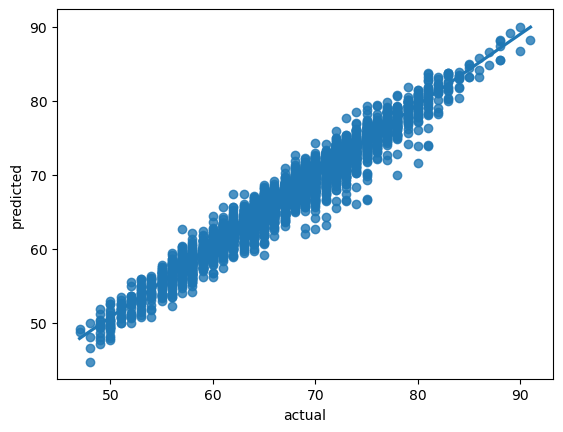

In [42]:
sns.regplot(results['actual'], results['predicted'])

***Our prediction model performs very well, and especially in lower values of ova, there seems to be almost exactly on point***

# I will now refer the predicted and actual overall values to the names of the players

In [58]:
data_ids = data[['id', 'name']]
data_ids

id             name
0           2      G. Pasquale
1          16      Luis García
2          27          J. Cole
3          41          Iniesta
4          61       D. Odonkor
...       ...              ...
16997  259088       A. Medioub
16998  259090       W. Rickard
16999  259091       C. Barrett
17000  259101   J. Gazibegović
17001  259105  Pablo Rodríguez

[17002 rows x 2 columns]

In [73]:
results = results.reset_index()

In [74]:
results.columns

Index(['index', 'actual', 'predicted', 'difference'], dtype='object')

In [76]:
results

index  actual  predicted  difference
0      3149      66      64.37        1.63
1      3288      78      79.19        1.19
2      8009      68      67.76        0.24
3     12419      75      72.31        2.69
4      8469      66      66.47        0.47
...     ...     ...        ...         ...
4246   4524      68      66.06        1.94
4247   5396      70      70.76        0.76
4248  15912      57      57.12        0.12
4249  13153      61      61.67        0.67
4250  16869      59      57.39        1.61

[4251 rows x 4 columns]

In [78]:
data_ids = data_ids.reset_index()

In [79]:
model_ranking = pd.merge(data_ids, results, on='index')
model_ranking

index      id             name  actual  predicted  difference
0         2      27          J. Cole      71      69.60        1.40
1        12    1040   Roberto Carlos      79      81.83        2.83
2        19    1256       C. Seedorf      82      83.15        1.15
3        25    2492           Eliseu      76      77.05        1.05
4        26    2651         S. Given      73      77.71        4.71
...     ...     ...              ...     ...        ...         ...
4246  16981  259054     Tiago Morais      61      61.35        0.35
4247  16986  259069       V. Radonja      63      62.51        0.49
4248  16989  259074       A. Hajdari      53      54.87        1.87
4249  16994  259083  S. Diarrassouba      58      59.24        1.24
4250  16997  259088       A. Medioub      64      60.59        3.41

[4251 rows x 6 columns]

In [81]:
model_ranking = model_ranking.drop('index', axis = 1)

# 10 best players based on overall (in train sample)

In [82]:
model_ranking.sort_values('actual', ascending=False).head(10)

id           name  actual  predicted  difference
708   192985   K. De Bruyne      91      88.12        2.88
1270  209331       M. Salah      90      86.72        3.28
1038  203376    V. van Dijk      90      89.98        0.02
147   155862   Sergio Ramos      89      89.16        0.16
418   182521       T. Kroos      88      85.52        2.48
1429  212622     J. Kimmich      88      87.31        0.69
201   162835  S. Handanovič      88      88.15        0.15
1310  210257        Ederson      88      88.02        0.02
1592  215914       N. Kanté      88      85.44        2.56
697   192387    C. Immobile      87      84.85        2.15

In [83]:
model_ranking.columns

Index(['id', 'name', 'actual', 'predicted', 'difference'], dtype='object')

In [87]:
new_named_cols = ['id', 'name', 'actual_overall', 'predicted_overall', 'difference']
model_ranking.columns = new_named_cols
model_ranking

id             name  actual_overall  predicted_overall  difference
0         27          J. Cole              71              69.60        1.40
1       1040   Roberto Carlos              79              81.83        2.83
2       1256       C. Seedorf              82              83.15        1.15
3       2492           Eliseu              76              77.05        1.05
4       2651         S. Given              73              77.71        4.71
...      ...              ...             ...                ...         ...
4246  259054     Tiago Morais              61              61.35        0.35
4247  259069       V. Radonja              63              62.51        0.49
4248  259074       A. Hajdari              53              54.87        1.87
4249  259083  S. Diarrassouba              58              59.24        1.24
4250  259088       A. Medioub              64              60.59        3.41

[4251 rows x 5 columns]

# And finally a step to step presentation of the results

In [98]:
ranking_initial = model_ranking[['name', 'actual_overall']]
ranking_initial.sort_values('actual_overall', ascending=False).head(10)

name  actual_overall
708    K. De Bruyne              91
1270       M. Salah              90
1038    V. van Dijk              90
147    Sergio Ramos              89
418        T. Kroos              88
1429     J. Kimmich              88
201   S. Handanovič              88
1310        Ederson              88
1592       N. Kanté              88
697     C. Immobile              87

In [95]:
ranking_predicted = model_ranking[['name', 'predicted_overall', 'difference']]
ranking_predicted.sort_values('predicted_overall', ascending=False).head(10)

name  predicted_overall  difference
1038    V. van Dijk              89.98        0.02
147    Sergio Ramos              89.16        0.16
201   S. Handanovič              88.15        0.15
708    K. De Bruyne              88.12        2.88
1310        Ederson              88.02        0.02
1429     J. Kimmich              87.31        0.69
1270       M. Salah              86.72        3.28
1604   A. Robertson              86.51        0.49
251     David Silva              85.72        0.28
418        T. Kroos              85.52        2.48

## - In the test sample, the best players are mostly the same but in a different order, indicating that the model really does perform remarkably well